In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter

In [ ]:
# Read and create data frame for Border Entries file
bd_ent = pd.read_csv('Border_Crossing_Entry_Data.csv')
bd_ent

In [307]:
# Read and create data frame for Trade file
trade = pd.read_csv('COW_Trade_3.0/dyadic_trade_3.0.csv')
trade.head()

In [77]:
# clean trade dataframe to only get data on us imports from canada
can_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Canada')]
can_export.head()
#flow 1 is from importer 2 into importer 1

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [78]:
# clean trade dataframe to only get data on us imoprts from mexico
mex_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Mexico')]
mex_export.head()
#flow 1 is from importer 2 into importer 1

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
790,2.0,70,1870,United States of America,Mexico,3.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
791,2.0,70,1871,United States of America,Mexico,3.0,8.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
792,2.0,70,1872,United States of America,Mexico,-9.0,-9.0,-9,-9,-9.0,-9.0,-9.0,-9.0,2.01
793,2.0,70,1873,United States of America,Mexico,4.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
794,2.0,70,1874,United States of America,Mexico,4.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [79]:
# append mexico export data frame to canada export data frame
complete_nafta_trade = can_export.append(mex_export)
complete_nafta_trade
#flow 1 is entering millions of dollars into US from 'importer 2'

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2.0,70,2005,United States of America,Mexico,172485.00,130402.00,2,2,-9.0,-9.0,-9.0,-9.0,2.01
926,2.0,70,2006,United States of America,Mexico,200515.00,143421.00,2,2,-9.0,-9.0,-9.0,-9.0,2.01
927,2.0,70,2007,United States of America,Mexico,212889.00,153420.00,2,2,-9.0,-9.0,-9.0,-9.0,3.00
928,2.0,70,2008,United States of America,Mexico,218086.00,166468.00,2,2,-9.0,-9.0,-9.0,-9.0,3.00


In [80]:
nafta_trade = complete_nafta_trade[['year', 'importer1', 'importer2', 'flow1']].copy()
nafta_trade

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14
...,...,...,...,...
925,2005,United States of America,Mexico,172485.00
926,2006,United States of America,Mexico,200515.00
927,2007,United States of America,Mexico,212889.00
928,2008,United States of America,Mexico,218086.00


In [81]:
nafta_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 929
Data columns (total 4 columns):
year         230 non-null int64
importer1    230 non-null object
importer2    230 non-null object
flow1        230 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.0+ KB


In [82]:
bd_ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [83]:
bd_ent['Year'] = pd.to_datetime(bd_ent['Date'])

In [84]:
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019-03-01


In [85]:
bd_ent['Month'] = pd.to_datetime(bd_ent['Date'])
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019-03-01,2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019-03-01,2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019-03-01,2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019-03-01,2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019-03-01,2019-03-01
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996-01-01,1996-01-01
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996-01-01,1996-01-01
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996-01-01,1996-01-01
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996-01-01,1996-01-01


In [86]:
bd_ent['Year'] = bd_ent['Year'].dt.year
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,2019-03-01


In [87]:
bd_ent['Month'] = bd_ent['Month'].dt.month
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [491]:
gb_year_df = bd_ent.groupby(bd_ent['State'])

In [492]:
gb_year_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
5014,Toledo-Sandusky,Ohio,4105,US-Canada Border,09/01/2018 12:00:00 AM,Personal Vehicles,33,POINT (-83.53303000000001 41.6648),2018,9
6072,Toledo-Sandusky,Ohio,4105,US-Canada Border,08/01/2018 12:00:00 AM,Personal Vehicles,122,POINT (-83.53303000000001 41.6648),2018,8
6969,Toledo-Sandusky,Ohio,4105,US-Canada Border,07/01/2018 12:00:00 AM,Personal Vehicles,111,POINT (-83.53303000000001 41.6648),2018,7
7689,Toledo-Sandusky,Ohio,4105,US-Canada Border,06/01/2018 12:00:00 AM,Personal Vehicles,90,POINT (-83.53303000000001 41.6648),2018,6


In [493]:
len(gb_year_df)

15

In [494]:
gb_year_df.tail()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
5014,Toledo-Sandusky,Ohio,4105,US-Canada Border,09/01/2018 12:00:00 AM,Personal Vehicles,33,POINT (-83.53303000000001 41.6648),2018,9
6072,Toledo-Sandusky,Ohio,4105,US-Canada Border,08/01/2018 12:00:00 AM,Personal Vehicles,122,POINT (-83.53303000000001 41.6648),2018,8
6969,Toledo-Sandusky,Ohio,4105,US-Canada Border,07/01/2018 12:00:00 AM,Personal Vehicles,111,POINT (-83.53303000000001 41.6648),2018,7
7689,Toledo-Sandusky,Ohio,4105,US-Canada Border,06/01/2018 12:00:00 AM,Personal Vehicles,90,POINT (-83.53303000000001 41.6648),2018,6
7967,Toledo-Sandusky,Ohio,4105,US-Canada Border,05/01/2018 12:00:00 AM,Personal Vehicles,17,POINT (-83.53303000000001 41.6648),2018,5
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [495]:
gb_year_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
5014,Toledo-Sandusky,Ohio,4105,US-Canada Border,09/01/2018 12:00:00 AM,Personal Vehicles,33,POINT (-83.53303000000001 41.6648),2018,9
6072,Toledo-Sandusky,Ohio,4105,US-Canada Border,08/01/2018 12:00:00 AM,Personal Vehicles,122,POINT (-83.53303000000001 41.6648),2018,8
6969,Toledo-Sandusky,Ohio,4105,US-Canada Border,07/01/2018 12:00:00 AM,Personal Vehicles,111,POINT (-83.53303000000001 41.6648),2018,7
7689,Toledo-Sandusky,Ohio,4105,US-Canada Border,06/01/2018 12:00:00 AM,Personal Vehicles,90,POINT (-83.53303000000001 41.6648),2018,6


In [93]:
measures = bd_ent.groupby(['Year','Border','Measure'])['Value'].sum()
measures.head()

Year  Border            Measure                    
1996  US-Canada Border  Bus Passengers                   3870081
                        Buses                             173279
                        Pedestrians                       607987
                        Personal Vehicle Passengers    101070734
                        Personal Vehicles               39531000
Name: Value, dtype: int64

In [94]:
measures
#each item in the measure column here will become a column in the nafta_trade df, with the values shown below inserted
# into each row for the given 

Year  Border            Measure                    
1996  US-Canada Border  Bus Passengers                   3870081
                        Buses                             173279
                        Pedestrians                       607987
                        Personal Vehicle Passengers    101070734
                        Personal Vehicles               39531000
                                                         ...    
2019  US-Mexico Border  Train Passengers                    2521
                        Trains                              2916
                        Truck Containers Empty            453762
                        Truck Containers Full            1185656
                        Trucks                           1619982
Name: Value, Length: 576, dtype: int64

In [95]:
measures = measures.reset_index()

In [96]:
measures.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000


In [97]:
per_border_vals = measures.groupby('Border')
per_border_vals.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000
12,1996,US-Mexico Border,Bus Passengers,1943697
13,1996,US-Mexico Border,Buses,119510
14,1996,US-Mexico Border,Pedestrians,34109364
15,1996,US-Mexico Border,Personal Vehicle Passengers,171522486
16,1996,US-Mexico Border,Personal Vehicles,62429373


In [98]:
total_measures = bd_ent.groupby(['Year', 'Measure'])['Value'].sum()
total_measures

Year  Measure                    
1996  Bus Passengers                   5813778
      Buses                             292789
      Pedestrians                     34717351
      Personal Vehicle Passengers    272593220
      Personal Vehicles              101960373
                                       ...    
2019  Train Passengers                   38014
      Trains                              8501
      Truck Containers Empty            825680
      Truck Containers Full            2230413
      Trucks                           3005611
Name: Value, Length: 288, dtype: int64

In [99]:
total_measures.reset_index()

,Year,Measure,Value
0,1996,Bus Passengers,5813778
1,1996,Buses,292789
2,1996,Pedestrians,34717351
3,1996,Personal Vehicle Passengers,272593220
4,1996,Personal Vehicles,101960373
...,...,...,...
283,2019,Train Passengers,38014
284,2019,Trains,8501
285,2019,Truck Containers Empty,825680
286,2019,Truck Containers Full,2230413


In [100]:
total_measures = total_measures.reset_index()

In [101]:
pivoted_totals = total_measures.pivot(index = 'Year', columns = 'Measure', values = 'Value')
pivoted_totals.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,5813778,292789,34717351,272593220,101960373,268134,472219,224881,38966,1599429,3124031,8685180
1997,6896919,389969,44461186,307001980,119003203,354288,620145,260610,40541,1920118,3708600,9516639
1998,7608484,436803,45060023,314295857,120451297,513721,1079074,258624,41116,2405012,6223216,10217477
1999,7725590,469496,48801064,330891505,126689655,611927,1376950,265341,38949,2768834,7641245,11176168
2000,8338859,460056,47677158,329841500,129202573,684988,1481674,287756,40555,2747769,7684947,11573707


In [102]:
measures.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000


In [103]:
can_measures = measures.loc[(measures['Border'] == 'US-Canada Border')]
can_measures.tail()

,Year,Border,Measure,Value
559,2019,US-Canada Border,Train Passengers,35493
560,2019,US-Canada Border,Trains,5585
561,2019,US-Canada Border,Truck Containers Empty,371918
562,2019,US-Canada Border,Truck Containers Full,1044757
563,2019,US-Canada Border,Trucks,1385629


In [104]:
mex_measures = measures.loc[(measures['Border'] == 'US-Mexico Border')]
mex_measures.tail()

,Year,Border,Measure,Value
571,2019,US-Mexico Border,Train Passengers,2521
572,2019,US-Mexico Border,Trains,2916
573,2019,US-Mexico Border,Truck Containers Empty,453762
574,2019,US-Mexico Border,Truck Containers Full,1185656
575,2019,US-Mexico Border,Trucks,1619982


In [105]:
len(mex_measures)

288

In [106]:
can_measures = can_measures.reset_index()
can_measures.tail()

,index,Year,Border,Measure,Value
283,559,2019,US-Canada Border,Train Passengers,35493
284,560,2019,US-Canada Border,Trains,5585
285,561,2019,US-Canada Border,Truck Containers Empty,371918
286,562,2019,US-Canada Border,Truck Containers Full,1044757
287,563,2019,US-Canada Border,Trucks,1385629


In [107]:
mex_measures = mex_measures.reset_index()
mex_measures.tail()

,index,Year,Border,Measure,Value
283,571,2019,US-Mexico Border,Train Passengers,2521
284,572,2019,US-Mexico Border,Trains,2916
285,573,2019,US-Mexico Border,Truck Containers Empty,453762
286,574,2019,US-Mexico Border,Truck Containers Full,1185656
287,575,2019,US-Mexico Border,Trucks,1619982


In [108]:
mex_measures = mex_measures.drop(columns=['index', 'Border'])
mex_measures.head()

,Year,Measure,Value
0,1996,Bus Passengers,1943697
1,1996,Buses,119510
2,1996,Pedestrians,34109364
3,1996,Personal Vehicle Passengers,171522486
4,1996,Personal Vehicles,62429373


In [109]:
can_measures = can_measures.drop(columns=['index','Border'])
can_measures.head()

,Year,Measure,Value
0,1996,Bus Passengers,3870081
1,1996,Buses,173279
2,1996,Pedestrians,607987
3,1996,Personal Vehicle Passengers,101070734
4,1996,Personal Vehicles,39531000


In [110]:
pivot_can = can_measures.pivot(index = 'Year', columns = 'Measure', values='Value')

In [111]:
pivot_mex = mex_measures.pivot(index='Year', columns = 'Measure', values = 'Value')

In [112]:
pivot_mex.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579


In [113]:
pivot_can.tail()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
2015,2039220,95833,444523,52122219,28544860,726818,1610670,286090,30969,1283452,4580887,5791021
2016,1939294,88234,461520,49812247,27319904,634506,1565927,287188,29486,1175217,4760317,5877938
2017,1864662,84182,442766,50145103,26759167,772283,1715989,284200,22475,1783210,4547644,5846593
2018,1795768,77864,486290,51460865,26904776,755431,1840464,289317,23730,1638277,4310625,5830926
2019,239178,12092,44921,9471529,5173856,167323,439447,35493,5585,371918,1044757,1385629


In [114]:
nafta_trade

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14
...,...,...,...,...
925,2005,United States of America,Mexico,172485.00
926,2006,United States of America,Mexico,200515.00
927,2007,United States of America,Mexico,212889.00
928,2008,United States of America,Mexico,218086.00


In [115]:
#nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
#nafta_can_trim = nafta_trade.drop(index = np.arange(24,90))

In [497]:
# can use reset_index(drop=True) instead
nafta_trade = nafta_trade.reset_index()
nafta_trade.head()

,index,year,importer1,importer2,flow1
0,0,1920,United States of America,Canada,611.86
1,1,1921,United States of America,Canada,335.44
2,2,1922,United States of America,Canada,364.02
3,3,1923,United States of America,Canada,416.00
4,4,1924,United States of America,Canada,399.14


In [498]:
nafta_trade = nafta_trade.drop(columns='index')
nafta_trade.head()

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14


In [118]:
# if year column equals 1996 then drop previos years
nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
nafta_can_trim.head()

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0


In [119]:
nafta_can_trim.head(25)

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [120]:
nafta_can_trim.tail()

,year,importer1,importer2,flow1
225,2005,United States of America,Mexico,172485.0
226,2006,United States of America,Mexico,200515.0
227,2007,United States of America,Mexico,212889.0
228,2008,United States of America,Mexico,218086.0
229,2009,United States of America,Mexico,178335.0


In [121]:
nafta_can_trim = nafta_can_trim.drop(index = np.arange(90,229))
nafta_can_trim

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [122]:
nafta_can_trim = nafta_can_trim.drop(index = 229)
nafta_can_trim

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [123]:
nafta_mex_trim = nafta_trade.drop(index = np.arange(0,216))
nafta_mex_trim

,year,importer1,importer2,flow1
216,1996,United States of America,Mexico,74111.1
217,1997,United States of America,Mexico,87167.2
218,1998,United States of America,Mexico,96077.8
219,1999,United States of America,Mexico,109499.0
220,2000,United States of America,Mexico,135080.0
221,2001,United States of America,Mexico,132778.0
222,2002,United States of America,Mexico,136144.0
223,2003,United States of America,Mexico,139702.0
224,2004,United States of America,Mexico,157821.0
225,2005,United States of America,Mexico,172485.0


In [124]:
pivot_mex

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688


In [125]:
nafta_mex_trim = nafta_mex_trim.set_index('year')
nafta_mex_trim

,importer1,importer2,flow1
year,,,
1996,United States of America,Mexico,74111.1
1997,United States of America,Mexico,87167.2
1998,United States of America,Mexico,96077.8
1999,United States of America,Mexico,109499.0
2000,United States of America,Mexico,135080.0
2001,United States of America,Mexico,132778.0
2002,United States of America,Mexico,136144.0
2003,United States of America,Mexico,139702.0
2004,United States of America,Mexico,157821.0


In [126]:
mexican_trade = pivot_mex.merge(nafta_mex_trim, left_index = True, right_on = 'year')
mexican_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer1,importer2,flow1
year,,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,United States of America,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,United States of America,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,United States of America,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,United States of America,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,United States of America,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,United States of America,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,United States of America,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,United States of America,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,United States of America,Mexico,157821.0


In [127]:
nafta_can_trim = nafta_can_trim.set_index('year')
canadian_trade = pivot_mex.merge(nafta_can_trim, left_index = True, right_on = 'year')

In [128]:
canadian_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer1,importer2,flow1
year,,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,United States of America,Canada,159746.0
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,United States of America,Canada,171440.0
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,United States of America,Canada,178048.0
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,United States of America,Canada,198829.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,United States of America,Canada,229191.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,United States of America,Canada,220138.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,United States of America,Canada,213954.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,United States of America,Canada,227652.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,United States of America,Canada,259807.0


In [129]:
all_trade = mexican_trade.append(canadian_trade)

In [130]:
all_trade = all_trade.drop(columns = 'importer1')

In [131]:
all_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer2,flow1
year,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,Mexico,157821.0


# Mexico Border Analysis by State

In [132]:
# Analyze the trends ovbserved by state over time
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3


In [133]:
# Access all rows with data related to the US-Mexico Border
mex_bd = bd_ent.loc[bd_ent['Border'] == 'US-Mexico Border'] 
mex_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
7,Progreso,Texas,2309,US-Mexico Border,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,POINT (-97.94889 26.061670000000003),2019,3
19,San Ysidro,California,2504,US-Mexico Border,03/01/2019 12:00:00 AM,Bus Passengers,7779,POINT (-117.02666999999998 32.54306),2019,3
...,...,...,...,...,...,...,...,...,...,...
346716,Naco,Arizona,2603,US-Mexico Border,01/01/1996 12:00:00 AM,Rail Containers Empty,0,POINT (-109.95 31.33),1996,1
346724,Otay Mesa,California,2506,US-Mexico Border,01/01/1996 12:00:00 AM,Truck Containers Empty,20862,POINT (-116.94 32.55),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [134]:
# Make new data frame with columns that I am only interested in
mex_bd_state = mex_bd[['Year', 'State', 'Measure', 'Value']]
mex_bd_state.head()

,Year,State,Measure,Value
0,2019,California,Trucks,34447
2,2019,California,Trucks,81217
3,2019,Arizona,Trains,62
7,2019,Texas,Truck Containers Empty,1808
19,2019,California,Bus Passengers,7779


In [135]:
# Just observing the unique types of enterance to the border
mex_bd_state['Measure'].unique()

array(['Trucks', 'Trains', 'Truck Containers Empty', 'Bus Passengers',
       'Pedestrians', 'Personal Vehicles', 'Truck Containers Full',
       'Personal Vehicle Passengers', 'Buses', 'Train Passengers',
       'Rail Containers Full', 'Rail Containers Empty'], dtype=object)

In [136]:
# Group my mexican border data from by Year, State, Measure, and sum counts of each measure
mex_bd_state = mex_bd_state.groupby(['Year','State','Measure'])['Value'].sum()
mex_bd_state

Year  State    Measure                    
1996  Arizona  Bus Passengers                    30778
               Buses                              4108
               Pedestrians                     7491274
               Personal Vehicle Passengers    21474592
               Personal Vehicles               8407128
                                                ...   
2019  Texas    Train Passengers                   1634
               Trains                             2554
               Truck Containers Empty           313800
               Truck Containers Full            817344
               Trucks                          1127189
Name: Value, Length: 1140, dtype: int64

In [137]:
# Reset my index
mex_bd_state = mex_bd_state.reset_index()
mex_bd_state

,Year,State,Measure,Value
0,1996,Arizona,Bus Passengers,30778
1,1996,Arizona,Buses,4108
2,1996,Arizona,Pedestrians,7491274
3,1996,Arizona,Personal Vehicle Passengers,21474592
4,1996,Arizona,Personal Vehicles,8407128
...,...,...,...,...
1135,2019,Texas,Train Passengers,1634
1136,2019,Texas,Trains,2554
1137,2019,Texas,Truck Containers Empty,313800
1138,2019,Texas,Truck Containers Full,817344


In [275]:
# pivot my data frame so that I can analyze my the total number of migrants coming into the US from Mexico by state over time
pvt_mex_bd_state = pd.pivot_table(mex_bd_state, values=['Value'], index='Year',
                 columns=['State', 'Measure'])
pvt_mex_bd_state

Value                                                   \
State          Arizona                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996           30778.0   4108.0   7491274.0                  21474592.0   
1997           33528.0   4572.0   7614629.0                  23182567.0   
1998           58055.0   5592.0   7601268.0                  23974390.0   
1999          100838.0  10018.0   8379549.0                  25221458.0   
2000          167035.0  14409.0   8390803.0                  26856458.0   
2001          174718.0  13344.0   8994847.0                  23726701.0   
2002          177830.0  13211.0   9682233.0                  26895469.0   
2003          209897.0  13407.0   9154958.0                  24424403.0   
2004          209100.0  12652.0   9186005.0                  25114067.0   
2005          242861.0  13461.0  10074501.0                  22539153.0   
2006          378829.0  18536.0  11328799.0                  20382103.0   
2007          309531.0  16913.0  11806206.0                  19593375.0   
2008          259714.0  15658.0  10517482.0                  18427240.0   
2009          194159.0  14035.0   8066921.0                  17579271.0   
2010          185071.0  12624.0   7648107.0                  14726256.0   
2011          178395.0  11586.0   7440332.0                  12879043.0   
2012          182114.0  10557.0   7048474.0                  14015636.0   
2013          182845.0  11294.0   7154131.0                  15462699.0   
2014          185376.0  12236.0   6310951.0                  16367308.0   
2015          195585.0  13088.0   6677176.0                  16918258.0   
2016          219887.0  13490.0   6980368.0                  16870301.0   
2017          220985.0  16163.0   7005728.0                  18146485.0   
2018          223884.0  12793.0   7110476.0                  17781150.0   
2019           54076.0   2662.0   1714160.0                   4069573.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996            8407128.0               11922.0              13430.0   
1997            9023069.0               12944.0              15539.0   
1998            9098298.0               15284.0              20528.0   
1999            9887368.0               14226.0              19466.0   
2000           10304130.0               25353.0              25249.0   
2001           10102009.0               22951.0              35716.0   
2002           10428347.0               20447.0              31789.0   
2003            9913062.0               21083.0              24602.0   
2004           10195882.0               19460.0              27439.0   
2005            9779607.0               18083.0              28748.0   
2006            8746845.0               17994.0              41821.0   
2007            8208024.0               18309.0              34060.0   
2008            7735264.0               23582.0              31975.0   
2009            7387953.0               18097.0              26735.0   
2010            6650691.0               18141.0              35862.0   
2011            6713284.0               22471.0              38761.0   
2012            7472683.0               23464.0              37931.0   
2013            8172192.0               33885.0              49481.0   
2014            8518851.0               32963.0              42802.0   
2015            8829393.0               34537.0              44778.0   
2016            8845350.0               31212.0              40042.0   
2017            9487133.0               30819.0              32014.0   
2018            9334650.0               4052

In [276]:
# Since 2019 is not complete. Remove this row from the dataframe
pvt_mex_bd_state = pvt_mex_bd_state.drop(2019, axis=0)
pvt_mex_bd_state

Value                                                   \
State          Arizona                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996           30778.0   4108.0   7491274.0                  21474592.0   
1997           33528.0   4572.0   7614629.0                  23182567.0   
1998           58055.0   5592.0   7601268.0                  23974390.0   
1999          100838.0  10018.0   8379549.0                  25221458.0   
2000          167035.0  14409.0   8390803.0                  26856458.0   
2001          174718.0  13344.0   8994847.0                  23726701.0   
2002          177830.0  13211.0   9682233.0                  26895469.0   
2003          209897.0  13407.0   9154958.0                  24424403.0   
2004          209100.0  12652.0   9186005.0                  25114067.0   
2005          242861.0  13461.0  10074501.0                  22539153.0   
2006          378829.0  18536.0  11328799.0                  20382103.0   
2007          309531.0  16913.0  11806206.0                  19593375.0   
2008          259714.0  15658.0  10517482.0                  18427240.0   
2009          194159.0  14035.0   8066921.0                  17579271.0   
2010          185071.0  12624.0   7648107.0                  14726256.0   
2011          178395.0  11586.0   7440332.0                  12879043.0   
2012          182114.0  10557.0   7048474.0                  14015636.0   
2013          182845.0  11294.0   7154131.0                  15462699.0   
2014          185376.0  12236.0   6310951.0                  16367308.0   
2015          195585.0  13088.0   6677176.0                  16918258.0   
2016          219887.0  13490.0   6980368.0                  16870301.0   
2017          220985.0  16163.0   7005728.0                  18146485.0   
2018          223884.0  12793.0   7110476.0                  17781150.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996            8407128.0               11922.0              13430.0   
1997            9023069.0               12944.0              15539.0   
1998            9098298.0               15284.0              20528.0   
1999            9887368.0               14226.0              19466.0   
2000           10304130.0               25353.0              25249.0   
2001           10102009.0               22951.0              35716.0   
2002           10428347.0               20447.0              31789.0   
2003            9913062.0               21083.0              24602.0   
2004           10195882.0               19460.0              27439.0   
2005            9779607.0               18083.0              28748.0   
2006            8746845.0               17994.0              41821.0   
2007            8208024.0               18309.0              34060.0   
2008            7735264.0               23582.0              31975.0   
2009            7387953.0               18097.0              26735.0   
2010            6650691.0               18141.0              35862.0   
2011            6713284.0               22471.0              38761.0   
2012            7472683.0               23464.0              37931.0   
2013            8172192.0               33885.0              49481.0   
2014            8518851.0               32963.0              42802.0   
2015            8829393.0               34537.0              44778.0   
2016            8845350.0               31212.0              40042.0   
2017            9487133.0               30819.0              32014.0   
2018            9334650.0               40520.0              28788.0   

                                              

In [326]:
# Find the total number of persons coming into each state on the Mexican Border
mex_per_table = pvt_mex_bd_state[pvt_mex_bd_state.columns[[0,2,3,7,12,14,15,19,24,26,27,31,36,38,39,43]]]
mex_per_table
# These numbers are massive

Value                                          \
State          Arizona                                           
Measure Bus Passengers Pedestrians Personal Vehicle Passengers   
Year                                                             
1996           30778.0   7491274.0                  21474592.0   
1997           33528.0   7614629.0                  23182567.0   
1998           58055.0   7601268.0                  23974390.0   
1999          100838.0   8379549.0                  25221458.0   
2000          167035.0   8390803.0                  26856458.0   
2001          174718.0   8994847.0                  23726701.0   
2002          177830.0   9682233.0                  26895469.0   
2003          209897.0   9154958.0                  24424403.0   
2004          209100.0   9186005.0                  25114067.0   
2005          242861.0  10074501.0                  22539153.0   
2006          378829.0  11328799.0                  20382103.0   
2007          309531.0  11806206.0                  19593375.0   
2008          259714.0  10517482.0                  18427240.0   
2009          194159.0   8066921.0                  17579271.0   
2010          185071.0   7648107.0                  14726256.0   
2011          178395.0   7440332.0                  12879043.0   
2012          182114.0   7048474.0                  14015636.0   
2013          182845.0   7154131.0                  15462699.0   
2014          185376.0   6310951.0                  16367308.0   
2015          195585.0   6677176.0                  16918258.0   
2016          219887.0   6980368.0                  16870301.0   
2017          220985.0   7005728.0                  18146485.0   
2018          223884.0   7110476.0                  17781150.0   

                                                     \
State                        California               
Measure Train Passengers Bus Passengers Pedestrians   
Year                                                  
1996                 0.0       260816.0   9548097.0   
1997                 0.0      1120631.0  17536073.0   
1998                 0.0      1194702.0  17757504.0   
1999               900.0      1215618.0  18278225.0   
2000              4752.0      1670733.0  18596679.0   
2001              2648.0      1402404.0  21699797.0   
2002              2216.0      1813716.0  18628200.0   
2003              1664.0      1576737.0  18193283.0   
2004              1656.0      1315400.0  18197094.0   
2005               952.0      1289332.0  16462335.0   
2006              2612.0      1425872.0  15517700.0   
2007              2352.0      1230642.0  16553220.0   
2008              2560.0      1022271.0  15064432.0   
2009              2252.0       644907.0  14124387.0   
2010              2408.0       753801.0  14740276.0   
2011              2836.0       726541.0  16859463.0   
2012              2628.0       841614.0  18140671.0   
2013              3466.0       796173.0  17729194.0   
2014              3180.0       794812.0  17762847.0   
2015              3204.0       705802.0  16615428.0   
2016              2981.0       417241.0  16918967.0   
2017              2600.0       224578.0  17999687.0   
2018              2887.0       200103.0  20160358.0   

                                                                     \
State                                                    New Mexico   
Measure Personal Vehicle Passengers Train Passengers Bus Passengers   
Year                                                                  
1996                     31211452.0           5579.0          281.0   
1997                     66727612.0           6378.0          780.0   
1998                     72113553.0           7591.0         1459.0   
1999                     75215939.0           9581.0         1577.0   
2000                     74569309.0           5522.0         1400.0   
2001                     67410517.0           7204.0         3311.0   
2002                     68180103.0   

In [327]:
# sum across rows to find total number of people coming into each year
az_per_mig = mex_per_table[('Value','Arizona')].sum(axis=1)
az_per_mig

Year
1996    28996644.0
1997    30830724.0
1998    31633713.0
1999    33702745.0
2000    35419048.0
2001    32898914.0
2002    36757748.0
2003    33790922.0
2004    34510828.0
2005    32857467.0
2006    32092343.0
2007    31711464.0
2008    29206996.0
2009    25842603.0
2010    22561842.0
2011    20500606.0
2012    21248852.0
2013    22803141.0
2014    22866815.0
2015    23794223.0
2016    24073537.0
2017    25375798.0
2018    25118397.0
dtype: float64

In [328]:
# Do the same for california
cal_per_mig = mex_per_table[('Value','California')].sum(axis=1)

In [329]:
# merge these two series
mex_per_sum = pd.concat([az_per_mig, cal_per_mig], axis=1)

In [330]:
# rename columns
mex_per_sum = mex_per_sum.rename(columns={0: "Arizona", 1: "California"})

In [331]:
# Perform same analysis for new mexico
nm_per_mig = mex_per_table[('Value','New Mexico')].sum(axis=1)

In [332]:
# merge new mexico series to the mexican persons summed dataframe

# mex_per_sum = pd.concat([mex_per_sum, nm_per_mig], axis=1)
mex_per_sum = mex_per_sum.merge(nm_per_mig.to_frame(), left_index=True, right_index=True)

In [333]:
mex_per_sum

,Arizona,California,0
Year,,,
1996,28996644.0,41025944.0,849867.0
1997,30830724.0,85390694.0,716171.0
1998,31633713.0,91073350.0,721950.0
1999,33702745.0,94719363.0,1506747.0
2000,35419048.0,94842243.0,1775723.0
2001,32898914.0,90519922.0,1543602.0
2002,36757748.0,88626173.0,1961163.0
2003,33790922.0,90529995.0,1896910.0
2004,34510828.0,85908563.0,1879669.0


In [334]:
# rename new column to New Mexico
mex_per_sum = mex_per_sum.rename(columns={0: "New Mexico"})

In [335]:
# Do same analysis for Texas
tx_per_mig = mex_per_table[('Value','Texas')].sum(axis=1)

In [337]:
# Merge TX series to dataframe
mex_per_sum = mex_per_sum.merge(tx_per_mig.to_frame(), left_index=True, right_index=True)

In [338]:
# rename new colum to Texas
mex_per_sum = mex_per_sum.rename(columns={0: "Texas"})

In [339]:
mex_per_sum

,Arizona,California,New Mexico,Texas
Year,,,,
1996,28996644.0,41025944.0,849867.0,136714377.0
1997,30830724.0,85390694.0,716171.0,144112883.0
1998,31633713.0,91073350.0,721950.0,150696714.0
1999,33702745.0,94719363.0,1506747.0,163180976.0
2000,35419048.0,94842243.0,1775723.0,158331350.0
2001,32898914.0,90519922.0,1543602.0,139030419.0
2002,36757748.0,88626173.0,1961163.0,125895151.0
2003,33790922.0,90529995.0,1896910.0,119902414.0
2004,34510828.0,85908563.0,1879669.0,120122963.0


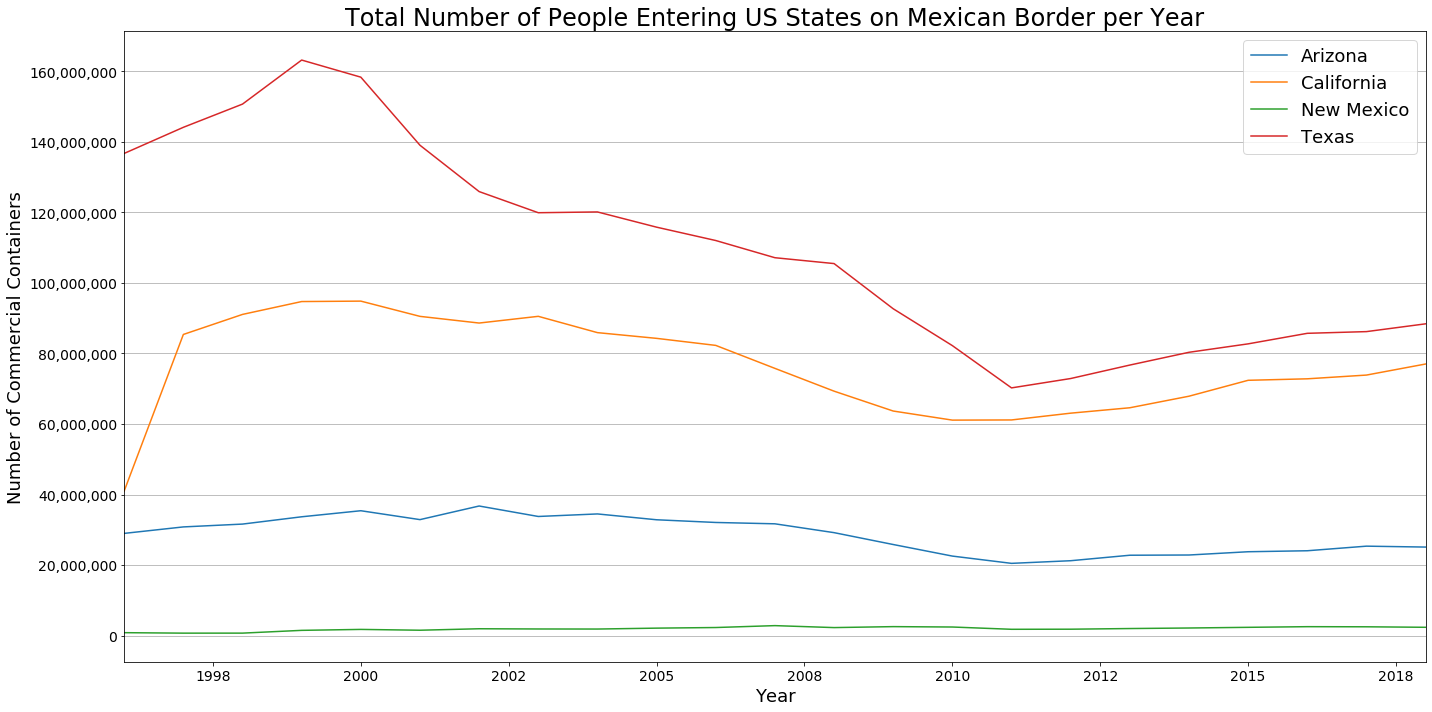

In [320]:
# Plot my findings

# mex_per_sum.plot(kind='line',)
# plt.legend(['Arizona','California','New Mexico','Texas'])
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ylabel('Pedestrians (10s of Millions)')
# plt.title('Number of Pedestrians Crossing Mexican Border per State')

mex_per_sum.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Commercial Containers', fontsize=18)
plt.title('Total Number of People Entering US States on Mexican Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
# I should drop 2019 from my graph since data is only collected until 2019

In [527]:
mex_per_table.head()

Value                                          \
State          Arizona                                           
Measure Bus Passengers Pedestrians Personal Vehicle Passengers   
Year                                                             
1996           30778.0   7491274.0                  21474592.0   
1997           33528.0   7614629.0                  23182567.0   
1998           58055.0   7601268.0                  23974390.0   
1999          100838.0   8379549.0                  25221458.0   
2000          167035.0   8390803.0                  26856458.0   

                                                     \
State                        California               
Measure Train Passengers Bus Passengers Pedestrians   
Year                                                  
1996                 0.0       260816.0   9548097.0   
1997                 0.0      1120631.0  17536073.0   
1998                 0.0      1194702.0  17757504.0   
1999               900.0      1215618.0  18278225.0   
2000              4752.0      1670733.0  18596679.0   

                                                                     \
State                                                    New Mexico   
Measure Personal Vehicle Passengers Train Passengers Bus Passengers   
Year                                                                  
1996                     31211452.0           5579.0          281.0   
1997                     66727612.0           6378.0          780.0   
1998                     72113553.0           7591.0         1459.0   
1999                     75215939.0           9581.0         1577.0   
2000                     74569309.0           5522.0         1400.0   

                                                                  \
State                                                              
Measure Pedestrians Personal Vehicle Passengers Train Passengers   
Year                                                               
1996       144652.0                    704934.0              0.0   
1997       120575.0                    594816.0              0.0   
1998       142050.0                    578441.0              0.0   
1999       199644.0                   1305526.0              0.0   
2000       191351.0                   1582972.0              0.0   

                                                                \
State            Texas                                           
Measure Bus Passengers Pedestrians Personal Vehicle Passengers   
Year                                                             
1996         1651822.0  16925341.0                 118131508.0   
1997         1617727.0  18640034.0                 123849996.0   
1998         2384596.0  18960732.0                 129346286.0   
1999         2040085.0  21355816.0                 139779387.0   
2000         1626748.0  19910809.0                 136785813.0   

                          
State                     
Measure Train Passengers  
Year                      
1996              5706.0  
1997              5126.0  
1998              5100.0  
1999              5688.0  
2000              7980.0

In [528]:
totals_mex_mig = mex_per_table.sum()

totals_mex_mig

       State       Measure                    
Value  Arizona     Bus Passengers                 4.321015e+06
                   Pedestrians                    1.916652e+08
                   Personal Vehicle Passengers    4.625584e+08
                   Train Passengers               5.075400e+04
       California  Bus Passengers                 2.264445e+07
                   Pedestrians                    3.930839e+08
                   Personal Vehicle Passengers    1.336133e+09
                   Train Passengers               6.736800e+04
       New Mexico  Bus Passengers                 3.890910e+05
                   Pedestrians                    6.766486e+06
                   Personal Vehicle Passengers    3.794554e+07
                   Train Passengers               0.000000e+00
       Texas       Bus Passengers                 4.014996e+07
                   Pedestrians                    4.281946e+08
                   Personal Vehicle Passengers    2.048072e+09
        

In [529]:
totals_mex_mig = totals_mex_mig.reset_index()
totals_mex_mig

,level_0,State,Measure,0
0,Value,Arizona,Bus Passengers,4.321015e+06
1,Value,Arizona,Pedestrians,1.916652e+08
2,Value,Arizona,Personal Vehicle Passengers,4.625584e+08
3,Value,Arizona,Train Passengers,5.075400e+04
4,Value,California,Bus Passengers,2.264445e+07
5,Value,California,Pedestrians,3.930839e+08
6,Value,California,Personal Vehicle Passengers,1.336133e+09
7,Value,California,Train Passengers,6.736800e+04
8,Value,New Mexico,Bus Passengers,3.890910e+05
9,Value,New Mexico,Pedestrians,6.766486e+06


In [530]:
totals_mex_mig = totals_mex_mig.drop('level_0', axis=1)

In [531]:
totals_mex_mig = totals_mex_mig.rename(columns={0:'Total Migrants'})

In [532]:
# Another way to drop a column
# totals_mex_com_df = totals_mex_com_df.drop(columns='level_0')

In [533]:
totals_mex_mig

,State,Measure,Total Migrants
0,Arizona,Bus Passengers,4.321015e+06
1,Arizona,Pedestrians,1.916652e+08
2,Arizona,Personal Vehicle Passengers,4.625584e+08
3,Arizona,Train Passengers,5.075400e+04
4,California,Bus Passengers,2.264445e+07
5,California,Pedestrians,3.930839e+08
6,California,Personal Vehicle Passengers,1.336133e+09
7,California,Train Passengers,6.736800e+04
8,New Mexico,Bus Passengers,3.890910e+05
9,New Mexico,Pedestrians,6.766486e+06


In [534]:
totals_mex_mig = totals_mex_mig.pivot(index='State', columns='Measure', values='Total Migrants')

In [538]:
totals_mex_mig = totals_mex_mig/1000000

Text(0.5, 1.0, 'Total Number of Migrants per State on Mexican Border')

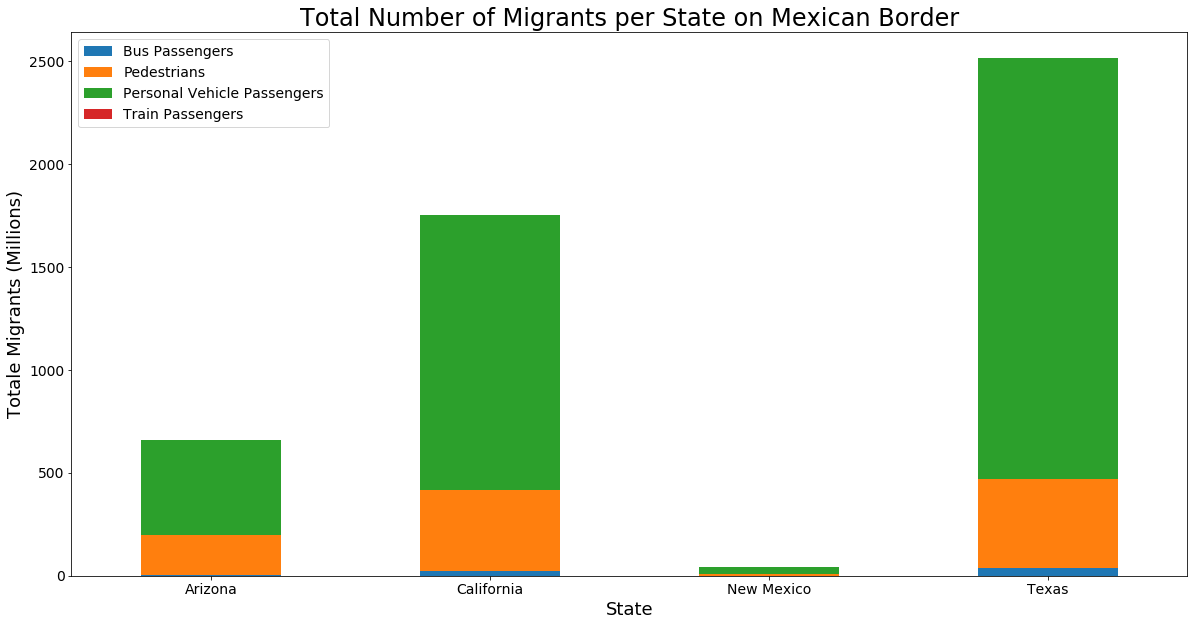

In [543]:
totals_mex_mig.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Totale Migrants (Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Total Number of Migrants per State on Mexican Border', fontsize=24)

In [473]:
totals_mex_com_df.index

Index(['Arizona', 'California', 'New Mexico', 'Texas'], dtype='object', name='State')

# Commercial Imports Analysis into Mexican Border States

In [340]:
pvt_mex_bd_state.head()

Value                                                   \
State          Arizona                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996           30778.0   4108.0   7491274.0                  21474592.0   
1997           33528.0   4572.0   7614629.0                  23182567.0   
1998           58055.0   5592.0   7601268.0                  23974390.0   
1999          100838.0  10018.0   8379549.0                  25221458.0   
2000          167035.0  14409.0   8390803.0                  26856458.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996            8407128.0               11922.0              13430.0   
1997            9023069.0               12944.0              15539.0   
1998            9098298.0               15284.0              20528.0   
1999            9887368.0               14226.0              19466.0   
2000           10304130.0               25353.0              25249.0   

                                                        ...              \
State                                                   ...       Texas   
Measure Train Passengers Trains Truck Containers Empty  ... Pedestrians   
Year                                                    ...               
1996                 0.0  533.0                88820.0  ...  16925341.0   
1997                 0.0  560.0                91133.0  ...  18640034.0   
1998                 0.0  531.0                91623.0  ...  18960732.0   
1999               900.0  587.0                84920.0  ...  21355816.0   
2000              4752.0  774.0                89555.0  ...  19910809.0   

                                                                             \
State                                                                         
Measure Personal Vehicle Passengers Personal Vehicles Rail Containers Empty   
Year                                                                          
1996                    118131508.0        42437643.0              124199.0   
1997                    123849996.0        43769959.0              154346.0   
1998                    129346286.0        45247787.0              190951.0   
1999                    139779387.0        48507638.0              252363.0   
2000                    136785813.0        50367666.0              272687.0   

                                                                              \
State                                                                          
Measure Rail Containers Full Train Passengers  Trains Truck Containers Empty   
Year                                                                           
1996                127570.0           5706.0  6465.0               904079.0   
1997                139273.0           5126.0  6610.0              1051701.0   
1998                153388.0           5100.0  4701.0              1201580.0   
1999                204033.0           5688.0  4882.0              1414693.0   
2000                239421.0           7980.0  5812.0              1312708.0   

                                          
State                                     
Measure Truck Containers Full     Trucks  
Year                                      
1996                1138826.0  2154370.0  
1997                1112423.0  2484700.0  
1998                1300778.0  2700806.0  
1999                1589282.0  3011229.0  
2000                1582995.0  3113277.0  

[5 rows x 48 columns]

In [360]:
mex_com_df = pvt_mex_bd_state[pvt_mex_bd_state.columns[[6,10,18,22,30,34,42,46]]]

In [361]:
mex_com_df.head()

Value                                             \
State                Arizona                                 California   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                 13430.0              192179.0               1236.0   
1997                 15539.0              199129.0               1252.0   
1998                 20528.0              226562.0               1574.0   
1999                 19466.0              242075.0               2515.0   
2000                 25249.0              232605.0               1565.0   

                                                                          \
State                                   New Mexico                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                 364189.0                  0.0                8208.0   
1997                 409294.0                  0.0               21568.0   
1998                 440535.0                  0.0               23493.0   
1999                 453952.0                  0.0               24507.0   
2000                 510413.0                  0.0               24087.0   

                                                    
State                  Texas                        
Measure Rail Containers Full Truck Containers Full  
Year                                                
1996                127570.0             1138826.0  
1997                139273.0             1112423.0  
1998                153388.0             1300778.0  
1999                204033.0             1589282.0  
2000                239421.0             1582995.0

In [362]:
az_com_imp = mex_com_df[('Value','Arizona')].sum(axis=1)

In [363]:
cal_com_imp = mex_com_df[('Value','California')].sum(axis=1)

In [364]:
mex_com_imp = pd.concat([az_com_imp, cal_com_imp], axis=1)

In [365]:
mex_com_imp = mex_com_imp.rename(columns={0:'Arizona', 1:'California'})

In [366]:
nm_com_imp = mex_com_df[('Value','New Mexico')].sum(axis=1)

In [368]:
mex_com_imp = mex_com_imp.merge(nm_com_imp.to_frame(), left_index=True, right_index=True)

In [370]:
mex_com_imp = mex_com_imp.rename(columns={0:'New Mexico'})

In [372]:
tx_com_imp = mex_com_df[('Value','Texas')].sum(axis=1)

In [373]:
mex_com_imp = mex_com_imp.merge(tx_com_imp.to_frame(), left_index=True, right_index=True)

In [375]:
mex_com_imp = mex_com_imp.rename(columns={0:'Texas'})

In [376]:
mex_com_imp

,Arizona,California,New Mexico,Texas
Year,,,,
1996,205609.0,365425.0,8208.0,1266396.0
1997,214668.0,410546.0,21568.0,1251696.0
1998,247090.0,442109.0,23493.0,1454166.0
1999,261541.0,456467.0,24507.0,1793315.0
2000,257854.0,511978.0,24087.0,1822416.0
2001,267193.0,526326.0,20751.0,1824427.0
2002,259034.0,582560.0,22998.0,1928032.0
2003,257048.0,612649.0,24653.0,1972138.0
2004,268152.0,661015.0,25850.0,2198971.0


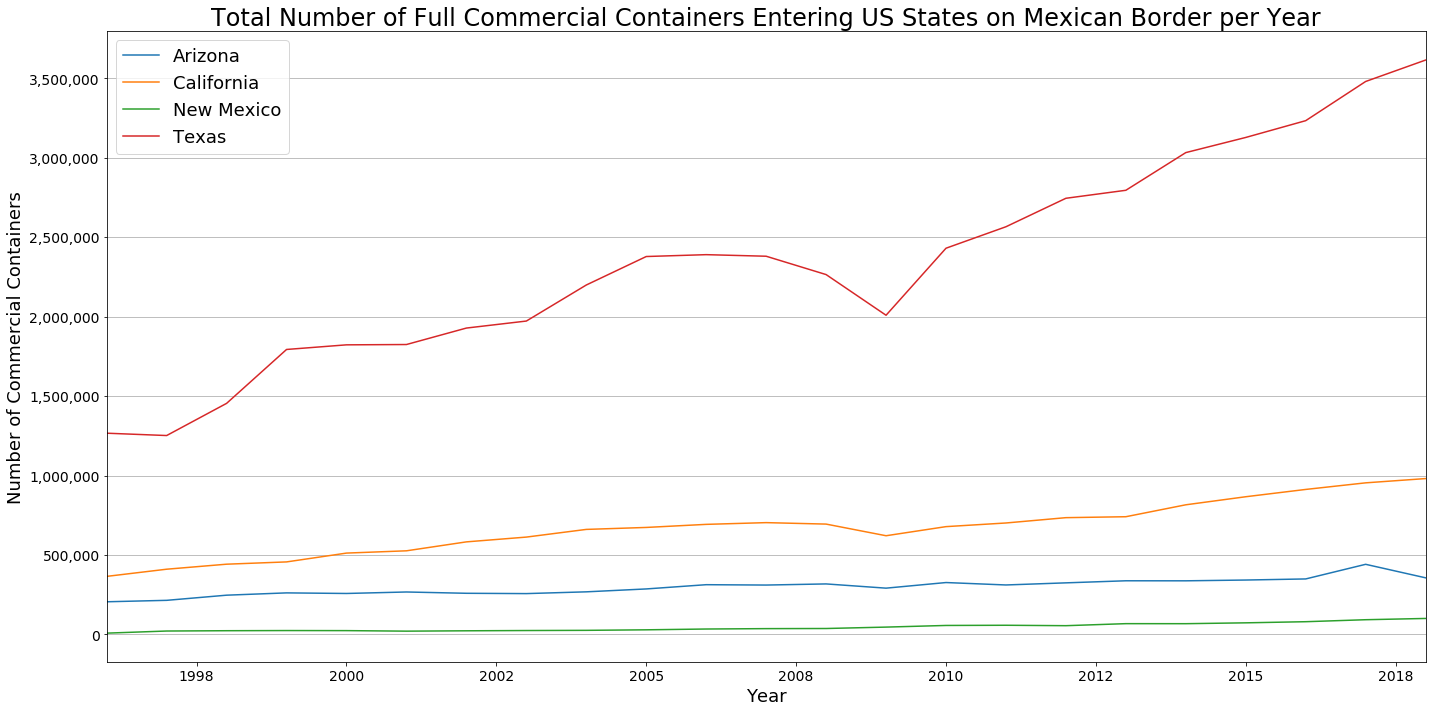

In [378]:
mex_com_imp.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Commercial Containers', fontsize=18)
plt.title('Total Number of Full Commercial Containers Entering US States on Mexican Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()

In [876]:
mex_com_df.head()

Value                                             \
State                Arizona                                 California   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                 13430.0              192179.0               1236.0   
1997                 15539.0              199129.0               1252.0   
1998                 20528.0              226562.0               1574.0   
1999                 19466.0              242075.0               2515.0   
2000                 25249.0              232605.0               1565.0   

                                                                          \
State                                   New Mexico                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                 364189.0                  0.0                8208.0   
1997                 409294.0                  0.0               21568.0   
1998                 440535.0                  0.0               23493.0   
1999                 453952.0                  0.0               24507.0   
2000                 510413.0                  0.0               24087.0   

                                                    
State                  Texas                        
Measure Rail Containers Full Truck Containers Full  
Year                                                
1996                127570.0             1138826.0  
1997                139273.0             1112423.0  
1998                153388.0             1300778.0  
1999                204033.0             1589282.0  
2000                239421.0             1582995.0

In [877]:
totals_mex_com_df = mex_com_df.sum()

In [878]:
totals_mex_com_df

       State       Measure              
Value  Arizona     Rail Containers Full       727556.0
                   Truck Containers Full     6157545.0
       California  Rail Containers Full        29237.0
                   Truck Containers Full    15310598.0
       New Mexico  Rail Containers Full            0.0
                   Truck Containers Full     1031625.0
       Texas       Rail Containers Full      6956127.0
                   Truck Containers Full    46999261.0
dtype: float64

In [879]:
totals_mex_com_df = totals_mex_com_df.reset_index()

In [880]:
totals_mex_com_df = totals_mex_com_df.rename(columns={0:'Total Containers'})

In [881]:
totals_mex_com_df = totals_mex_com_df.drop(columns='level_0')

In [882]:
totals_mex_com_df

,State,Measure,Total Containers
0,Arizona,Rail Containers Full,727556.0
1,Arizona,Truck Containers Full,6157545.0
2,California,Rail Containers Full,29237.0
3,California,Truck Containers Full,15310598.0
4,New Mexico,Rail Containers Full,0.0
5,New Mexico,Truck Containers Full,1031625.0
6,Texas,Rail Containers Full,6956127.0
7,Texas,Truck Containers Full,46999261.0


In [883]:
totals_mex_com_df = totals_mex_com_df.pivot(index='State', columns='Measure', values='Total Containers')

In [884]:
totals_mex_com_df = totals_mex_com_df/1000000

In [885]:
totals_mex_com_df.index

Index(['Arizona', 'California', 'New Mexico', 'Texas'], dtype='object', name='State')

Text(0.5, 1.0, 'Contribution of Imported Containers per State on Mexicon Border')

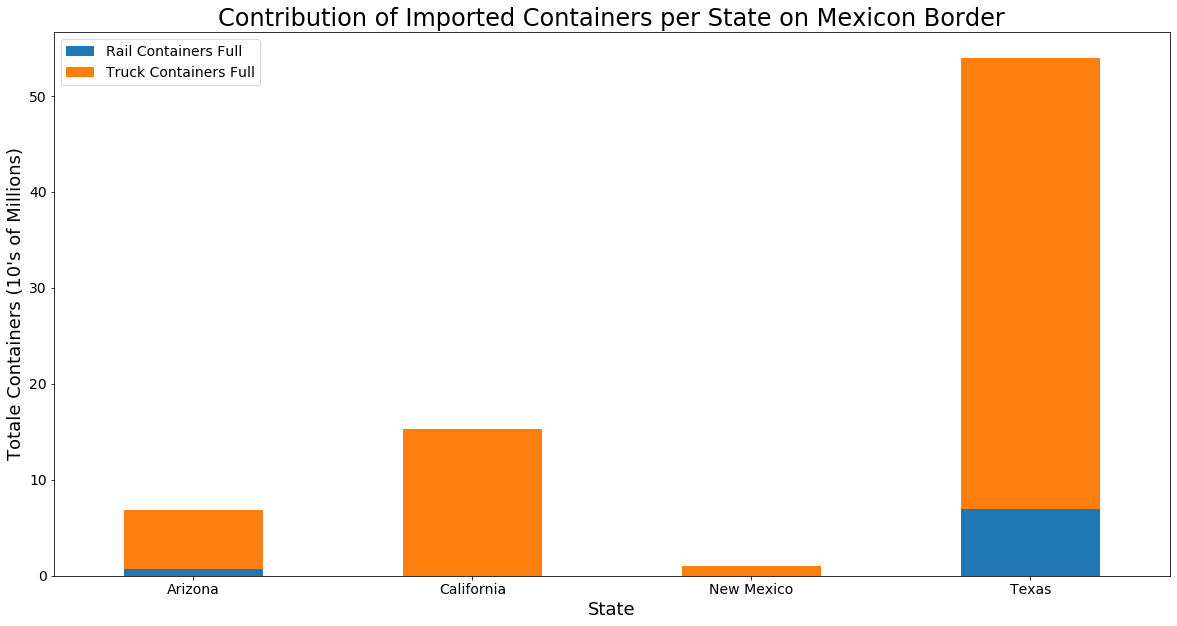

In [886]:


totals_mex_com_df.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Totale Containers (10\'s of Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Contribution of Imported Containers per State on Mexicon Border', fontsize=24)

# Canada Border Analysis by State

In [141]:
can_bd = bd_ent.loc[bd_ent['Border'] == 'US-Canada Border'] 
can_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
5,Madawaska,Maine,109,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,179,POINT (-68.3271 47.35446),2019,3
6,Pembina,North Dakota,3401,US-Canada Border,03/01/2019 12:00:00 AM,Bus Passengers,1054,POINT (-97.24333 48.96639),2019,3
8,Portal,North Dakota,3403,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Empty,6685,POINT (-102.54917 48.99583),2019,3
...,...,...,...,...,...,...,...,...,...,...
346725,Northgate,North Dakota,3406,US-Canada Border,01/01/1996 12:00:00 AM,Trucks,1107,POINT (-102.27 49),1996,1
346726,Turner,Montana,3306,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Empty,0,POINT (-108.39 49),1996,1
346727,Fort Kent,Maine,110,US-Canada Border,01/01/1996 12:00:00 AM,Trucks,1333,POINT (-68.6 47.25),1996,1
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1


In [142]:
can_bd_state = can_bd[['Year', 'State', 'Measure', 'Value']]
can_bd_state.head()

,Year,State,Measure,Value
1,2019,Maine,Rail Containers Full,428
4,2019,New York,Personal Vehicle Passengers,16377
5,2019,Maine,Trucks,179
6,2019,North Dakota,Bus Passengers,1054
8,2019,North Dakota,Rail Containers Empty,6685


In [143]:
can_bd_state['Measure'].unique()

array(['Rail Containers Full', 'Personal Vehicle Passengers', 'Trucks',
       'Bus Passengers', 'Rail Containers Empty', 'Personal Vehicles',
       'Buses', 'Truck Containers Full', 'Pedestrians',
       'Train Passengers', 'Trains', 'Truck Containers Empty'],
      dtype=object)

In [144]:
can_bd_state = can_bd_state.groupby(['Year','State','Measure'])['Value'].sum()
can_bd_state

Year  State       Measure                    
1996  Alaska      Bus Passengers                 106758
                  Buses                            7867
                  Pedestrians                       781
                  Personal Vehicle Passengers    259251
                  Personal Vehicles              116554
                                                  ...  
2019  Washington  Train Passengers                16385
                  Trains                            629
                  Truck Containers Empty          48952
                  Truck Containers Full          109614
                  Trucks                         153315
Name: Value, Length: 2870, dtype: int64

In [145]:
can_bd_state = can_bd_state.reset_index()

In [146]:
can_bd_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 4 columns):
Year       2870 non-null int64
State      2870 non-null object
Measure    2870 non-null object
Value      2870 non-null int64
dtypes: int64(2), object(2)
memory usage: 89.8+ KB


In [147]:
pvt_can_bd_state = pd.pivot_table(can_bd_state, values=['Value'], index='Year',
                                  columns=['State', 'Measure'])
pvt_can_bd_state

Value                                                   \
State           Alaska                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996          106758.0   7867.0       781.0                    259251.0   
1997          133063.0   9115.0       652.0                    256530.0   
1998          149938.0   9666.0       576.0                    303421.0   
1999          156234.0  10134.0       432.0                    260303.0   
2000          149128.0   9603.0       216.0                    264428.0   
2001          138933.0   9044.0       318.0                    251583.0   
2002          141450.0   9391.0       247.0                    256106.0   
2003          147567.0  10080.0       346.0                    241965.0   
2004          145868.0  10200.0      4066.0                    253701.0   
2005          147633.0  11077.0      3989.0                    238445.0   
2006          156849.0  11177.0      3527.0                    211605.0   
2007          170600.0  12202.0       932.0                    207882.0   
2008          167144.0  11915.0       713.0                    190112.0   
2009          170065.0  11015.0      2836.0                    205504.0   
2010          157102.0  10830.0      2745.0                    207433.0   
2011          158466.0  11102.0      2781.0                    213009.0   
2012          168851.0  12197.0      2486.0                    229786.0   
2013          164685.0  12543.0      2640.0                    229863.0   
2014          189989.0  13002.0      2066.0                    214766.0   
2015          167107.0  11398.0      5428.0                    238622.0   
2016          182062.0  12003.0      3502.0                    261082.0   
2017          188239.0  12220.0      2112.0                    260404.0   
2018          210359.0  11893.0      2566.0                    285309.0   
2019               NaN      NaN        72.0                     15892.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996             116554.0                   0.0                  0.0   
1997             114562.0                   0.0                  0.0   
1998             124396.0                   0.0                  0.0   
1999             119662.0                   0.0                  0.0   
2000             117925.0                   0.0                  0.0   
2001             115559.0                   0.0                  0.0   
2002             112494.0                   0.0                  0.0   
2003             114387.0                   0.0                  0.0   
2004             117142.0                   0.0                  0.0   
2005             111563.0                   0.0                  0.0   
2006              99334.0                   0.0                  0.0   
2007             106534.0                   0.0                  0.0   
2008              91950.0                   0.0                  0.0   
2009              97832.0                   0.0                  0.0   
2010              97879.0                   0.0                  0.0   
2011              92911.0                   0.0                  0.0   
2012              91014.0                   0.0                  0.0   
2013              90780.0                   0.0                  0.0   
2014              89997.0                   0.0                  0.0   
2015             108430.0                   0.0                  0.0   
2016             122011.0                   0.0                  0.0   
2017             120361.0                   NaN                  NaN   
2018             124401.0                   

In [566]:
pvt_can_bd_state = pvt_can_bd_state.drop(index=2019)

In [567]:
can_bd.State.unique()

array(['Maine', 'New York', 'North Dakota', 'Montana', 'Minnesota',
       'Vermont', 'Washington', 'Idaho', 'Michigan', 'Alaska', 'Ohio'],
      dtype=object)

In [568]:
can_ped_table = pvt_can_bd_state[pvt_can_bd_state.columns[[2,14,26,38,50,62,74,86,98,110]]]
can_ped_table

Value                                                  \
State        Alaska       Idaho       Maine    Michigan   Minnesota   
Measure Pedestrians Pedestrians Pedestrians Pedestrians Pedestrians   
Year                                                                  
1996          781.0      2361.0    113198.0     33099.0     35668.0   
1997          652.0      3963.0    112392.0     15285.0     37639.0   
1998          576.0      2583.0    122024.0         0.0     45426.0   
1999          432.0      2728.0    120816.0         0.0     26147.0   
2000          216.0      2864.0    121807.0      2325.0     27888.0   
2001          318.0      2393.0    117928.0      3983.0     28897.0   
2002          247.0      2225.0    101470.0      2799.0     25605.0   
2003          346.0      1907.0    105011.0      3439.0     29189.0   
2004         4066.0      1784.0    115011.0      6445.0     29769.0   
2005         3989.0      1796.0     87153.0      8481.0     26103.0   
2006         3527.0      1702.0     57286.0      9708.0     21924.0   
2007          932.0       109.0     48188.0      9993.0     15466.0   
2008          713.0       261.0     45007.0     11417.0     16348.0   
2009         2836.0       437.0     24569.0     12843.0     15788.0   
2010         2745.0      1560.0     15194.0     12944.0     22198.0   
2011         2781.0      2570.0     17208.0     12827.0     18849.0   
2012         2486.0      2443.0     23032.0     14103.0     16506.0   
2013         2640.0      2617.0     26845.0     16574.0     14710.0   
2014         2066.0      2916.0     27872.0     16192.0     15946.0   
2015         5428.0      2526.0     15810.0     16376.0     13934.0   
2016         3502.0      2498.0     13496.0     15011.0     12483.0   
2017         2112.0      2581.0      9845.0     15631.0     11687.0   
2018         2566.0      2404.0     10454.0     13770.0     10999.0   

                                                                 
State       Montana    New York North Dakota Vermont Washington  
Measure Pedestrians Pedestrians  Pedestrians   Buses      Buses  
Year                                                             
1996        18365.0    266917.0      10813.0  6174.0    22767.0  
1997        15617.0    225496.0      10140.0  6166.0    24582.0  
1998        15869.0    305951.0       9980.0  6483.0    22713.0  
1999        21197.0    312779.0       8002.0  6431.0    24215.0  
2000        14418.0    286693.0       7303.0  6616.0    22386.0  
2001         8358.0    421180.0       9625.0  6409.0    20460.0  
2002         6056.0    825447.0       7459.0  5533.0    19124.0  
2003         7018.0    662036.0       6289.0  5175.0    16171.0  
2004         4893.0    549740.0       5298.0  5429.0    18039.0  
2005         4533.0    372805.0       5189.0  5863.0    16783.0  
2006         2955.0    348551.0       7300.0  4821.0    17093.0  
2007         2471.0    278797.0      11334.0  4455.0    18078.0  
2008         2106.0    336146.0       5359.0  3981.0    17283.0  
2009         5048.0    246766.0       3545.0  3577.0    17677.0  
2010         3073.0    262172.0       3534.0  5215.0    17985.0  
2011         3588.0    285129.0       2597.0  5440.0    17220.0  
2012         5145.0    293405.0       2933.0  5260.0    17519.0  
2013         5391.0    283492.0       3943.0  5282.0    16604.0  
2014         4355.0    277104.0       4490.0  5520.0    16716.0  
2015         5404.0    308533.0       4322.0  5717.0    16274.0  
2016         4365.0    343791.0       3071.0  5539.0    16377.0  
2017         3533.0    337579.0       2069.0  5623.0    16133.0  
2018         4100.0    363102.0       1972.0  5382.0    15739.0

Something seems wrong with my data frame. The frequency at which the pedestrian column occurs is staggared after North Dakota

In [569]:
ohio_bd = can_bd.loc[can_bd['State'] == 'Ohio']
ohio_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
5014,Toledo-Sandusky,Ohio,4105,US-Canada Border,09/01/2018 12:00:00 AM,Personal Vehicles,33,POINT (-83.53303000000001 41.6648),2018,9
6072,Toledo-Sandusky,Ohio,4105,US-Canada Border,08/01/2018 12:00:00 AM,Personal Vehicles,122,POINT (-83.53303000000001 41.6648),2018,8
6969,Toledo-Sandusky,Ohio,4105,US-Canada Border,07/01/2018 12:00:00 AM,Personal Vehicles,111,POINT (-83.53303000000001 41.6648),2018,7
7689,Toledo-Sandusky,Ohio,4105,US-Canada Border,06/01/2018 12:00:00 AM,Personal Vehicles,90,POINT (-83.53303000000001 41.6648),2018,6
7967,Toledo-Sandusky,Ohio,4105,US-Canada Border,05/01/2018 12:00:00 AM,Personal Vehicles,17,POINT (-83.53303000000001 41.6648),2018,5


In [570]:
# Next State in alphabetically is Ohio
ohio_bd.Measure.unique()
# Seems there is only type of measure for Ohio which is staggering my canadian dataframe

array(['Personal Vehicles'], dtype=object)

In [571]:
# Corrected dataframe for pedestrian migration
can_ped_table = pvt_can_bd_state[pvt_can_bd_state.columns[[2,14,26,38,50,62,74,86,99,111]]]
can_ped_table

Value                                                  \
State        Alaska       Idaho       Maine    Michigan   Minnesota   
Measure Pedestrians Pedestrians Pedestrians Pedestrians Pedestrians   
Year                                                                  
1996          781.0      2361.0    113198.0     33099.0     35668.0   
1997          652.0      3963.0    112392.0     15285.0     37639.0   
1998          576.0      2583.0    122024.0         0.0     45426.0   
1999          432.0      2728.0    120816.0         0.0     26147.0   
2000          216.0      2864.0    121807.0      2325.0     27888.0   
2001          318.0      2393.0    117928.0      3983.0     28897.0   
2002          247.0      2225.0    101470.0      2799.0     25605.0   
2003          346.0      1907.0    105011.0      3439.0     29189.0   
2004         4066.0      1784.0    115011.0      6445.0     29769.0   
2005         3989.0      1796.0     87153.0      8481.0     26103.0   
2006         3527.0      1702.0     57286.0      9708.0     21924.0   
2007          932.0       109.0     48188.0      9993.0     15466.0   
2008          713.0       261.0     45007.0     11417.0     16348.0   
2009         2836.0       437.0     24569.0     12843.0     15788.0   
2010         2745.0      1560.0     15194.0     12944.0     22198.0   
2011         2781.0      2570.0     17208.0     12827.0     18849.0   
2012         2486.0      2443.0     23032.0     14103.0     16506.0   
2013         2640.0      2617.0     26845.0     16574.0     14710.0   
2014         2066.0      2916.0     27872.0     16192.0     15946.0   
2015         5428.0      2526.0     15810.0     16376.0     13934.0   
2016         3502.0      2498.0     13496.0     15011.0     12483.0   
2017         2112.0      2581.0      9845.0     15631.0     11687.0   
2018         2566.0      2404.0     10454.0     13770.0     10999.0   

                                                                      
State       Montana    New York North Dakota     Vermont  Washington  
Measure Pedestrians Pedestrians  Pedestrians Pedestrians Pedestrians  
Year                                                                  
1996        18365.0    266917.0      10813.0     21894.0    104891.0  
1997        15617.0    225496.0      10140.0     23317.0    105374.0  
1998        15869.0    305951.0       9980.0     21965.0     74095.0  
1999        21197.0    312779.0       8002.0     28802.0     66927.0  
2000        14418.0    286693.0       7303.0     21835.0    102167.0  
2001         8358.0    421180.0       9625.0     23186.0    136717.0  
2002         6056.0    825447.0       7459.0     19530.0     93643.0  
2003         7018.0    662036.0       6289.0     16158.0    109539.0  
2004         4893.0    549740.0       5298.0     12804.0    102652.0  
2005         4533.0    372805.0       5189.0     14485.0     89286.0  
2006         2955.0    348551.0       7300.0     10985.0     71074.0  
2007         2471.0    278797.0      11334.0      7479.0     64040.0  
2008         2106.0    336146.0       5359.0      4453.0     73071.0  
2009         5048.0    246766.0       3545.0      3632.0     60752.0  
2010         3073.0    262172.0       3534.0      2897.0     64428.0  
2011         3588.0    285129.0       2597.0      4063.0     48987.0  
2012         5145.0    293405.0       2933.0      4282.0     60535.0  
2013         5391.0    283492.0       3943.0      4996.0     72460.0  
2014         4355.0    277104.0       4490.0      5626.0     83230.0  
2015         5404.0    308533.0       4322.0      1642.0     70548.0  
2016         4365.0    343791.0       3071.0       379.0     62924.0  
2017         3533.0    337579.0       2069.0       409.0     57320.0  
2018         4100.0    363102.0       1972.0       379.0     76544.0

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

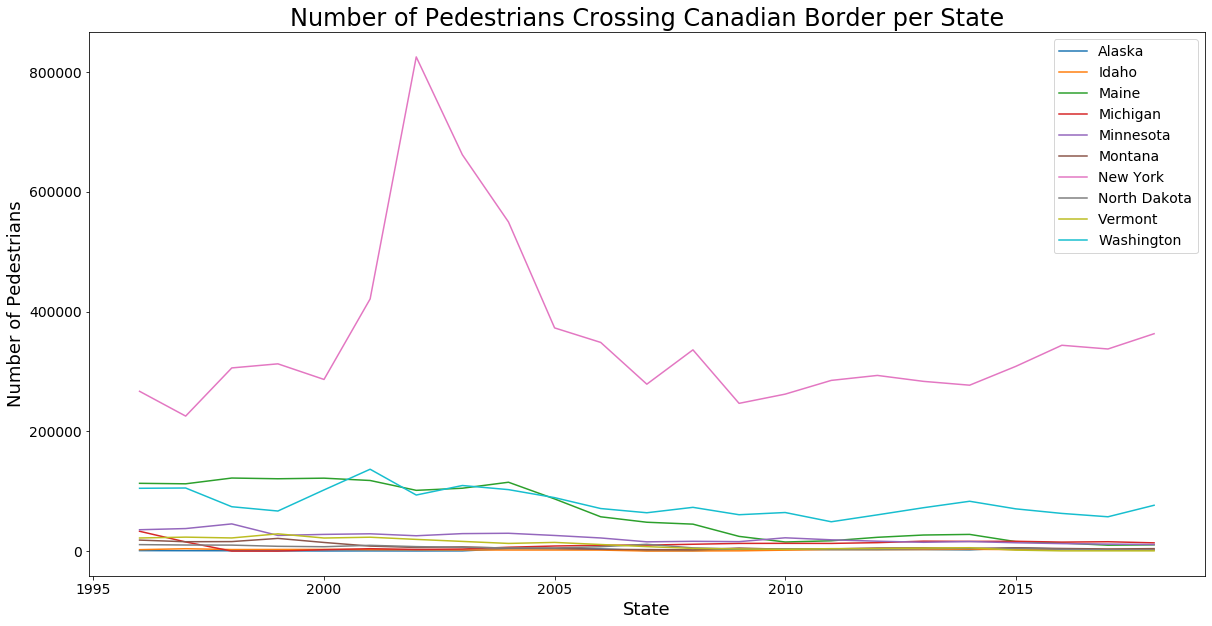

In [572]:
plt.plot(can_ped_table)
plt.legend(['Alaska', 'Idaho','Maine','Michigan','Minnesota','Montana','New York','North Dakota','Vermont','Washington'], fontsize=14)
plt.ylabel('Number of Pedestrians', fontsize=18)
plt.title('Number of Pedestrians Crossing Canadian Border per State', fontsize=24)

plt.xlabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout

In [ ]:
can_per_table = can_per_table.drop(index=2019)

In [804]:
# Also, I am more interested in all people crossing the canadian border, not just pedestrians. Iclude, Bus passengers, and Personal Vehicle Passengers
can_mig = pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3,7,12,14,15,19,24,26,27,31,36,38,39,43,48,50,51,55,60,62,63,67,72,74,75,79,84,86,87,91,97,99,100,104,109,111,112,116]]]

In [746]:
ak_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3,7]]].sum(axis=1)

In [747]:
id_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[12,14,15,19]]].sum(axis=1)

In [748]:
can_per_table = pd.concat([ak_per_table, id_per_table], axis=1)

In [749]:
can_per_table = can_per_table.rename(columns={0: "Alaska", 1: "Idaho"})

In [750]:
main_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[24,26,27,31]]].sum(axis=1)

In [751]:
can_per_table = can_per_table.merge(main_per_table.to_frame(), left_index=True, right_index=True)

In [752]:
can_per_table = can_per_table.rename(columns={0: "Main"})

In [753]:
mich_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[36,38,39,43]]].sum(axis=1)

In [754]:
can_per_table = can_per_table.merge(mich_per_table.to_frame(), left_index=True, right_index=True)

In [755]:
can_per_table = can_per_table.rename(columns={0: "Michigan"})

In [756]:
minn_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[48,50,51,55]]].sum(axis=1)

In [757]:
can_per_table = can_per_table.merge(minn_per_table.to_frame(), left_index=True, right_index=True)

In [758]:
can_per_table = can_per_table.rename(columns={0: "Minnesota"})

In [759]:
mont_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[60,62,63,67]]].sum(axis=1)

In [760]:
can_per_table = can_per_table.merge(mont_per_table.to_frame(), left_index=True, right_index=True)

In [761]:
can_per_table = can_per_table.rename(columns={0: "Montana"})

In [762]:
ny_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[72,74,75,79]]].sum(axis=1)

In [763]:
can_per_table = can_per_table.merge(ny_per_table.to_frame(), left_index=True, right_index=True)

In [764]:
can_per_table = can_per_table.rename(columns={0: "New York"})

In [765]:
nd_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[84,86,87,91]]].sum(axis=1)

In [766]:
can_per_table = can_per_table.merge(nd_per_table.to_frame(), left_index=True, right_index=True)

In [767]:
can_per_table = can_per_table.rename(columns={0: "North Dakota"})

In [768]:
vt_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[97,99,100,104]]].sum(axis=1)

In [769]:
can_per_table = can_per_table.merge(vt_per_table.to_frame(), left_index=True, right_index=True)

In [770]:
can_per_table = can_per_table.rename(columns={0: "Vermont"})

In [771]:
wash_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[109,111,112,116]]].sum(axis=1)

In [772]:
can_per_table = can_per_table.merge(wash_per_table.to_frame(), left_index=True, right_index=True)

In [773]:
can_per_table = can_per_table.rename(columns={0: "Washington"})

In [774]:
can_per_table = can_per_table/1000000
can_per_table

,Alaska,Idaho,Main,Michigan,Minnesota,Montana,New York,North Dakota,Vermont,Washington
Year,,,,,,,,,,
1996,0.389858,0.548265,9.717605,35.737711,3.185284,1.703817,28.305410,1.992093,3.745833,20.436522
1997,0.412568,0.557633,9.392549,28.423111,2.945267,1.723464,30.072414,1.830518,3.479050,18.733649
1998,0.484515,0.515092,8.784477,30.453780,3.041474,1.677457,28.412846,1.710819,3.241577,14.775224
1999,0.445135,0.549129,8.360848,30.372705,3.077093,1.882187,28.120518,1.758913,3.513607,16.493534
2000,0.449025,0.533139,8.157485,33.684048,3.186617,1.508956,28.157505,1.799621,3.340048,14.960465
2001,0.424587,0.505233,7.001602,23.296595,2.874546,1.352227,26.960897,1.622173,3.146653,13.249265
2002,0.427557,0.428262,6.209144,19.590521,2.679808,1.344529,28.568869,1.681957,3.088227,10.520220
2003,0.434308,0.380517,6.230425,17.741455,2.792346,1.378490,23.625248,1.621139,2.864795,10.023511
2004,0.455988,0.368708,6.885424,17.417659,2.989211,1.399094,23.522840,1.655062,2.791350,10.730651


Text(0.5, 0, 'Year')

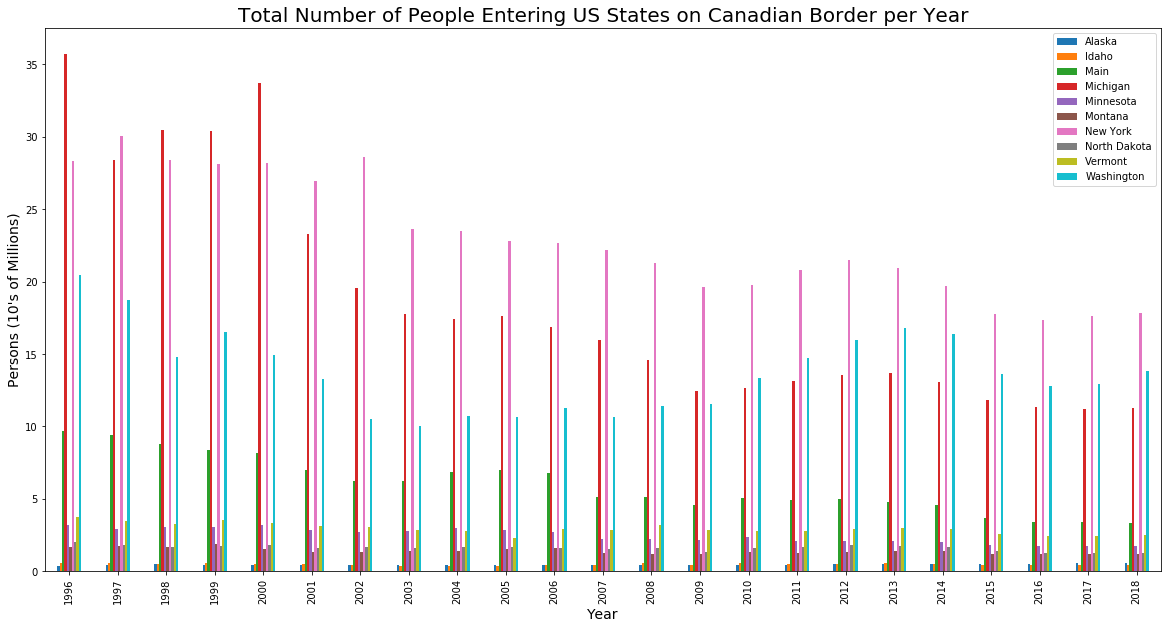

In [775]:
can_per_table.plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Persons (10\'s of Millions)', fontsize=14)
plt.title('Total Number of People Entering US States on Canadian Border per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)

Lets look at this as a line graph

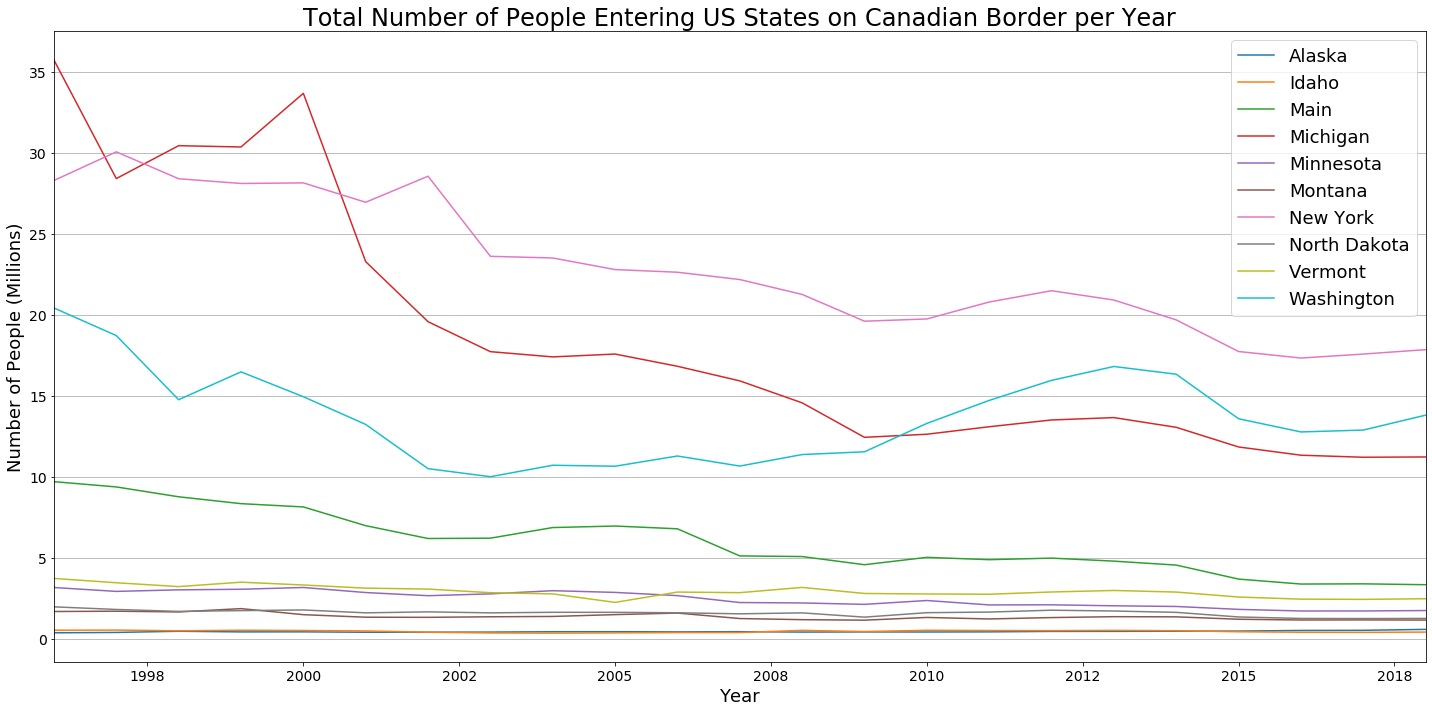

In [777]:
can_per_table.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of People (Millions)', fontsize=18)
plt.title('Total Number of People Entering US States on Canadian Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()

In [805]:
can_mig.head()

Value                                          \
State           Alaska                                           
Measure Bus Passengers Pedestrians Personal Vehicle Passengers   
Year                                                             
1996          106758.0       781.0                    259251.0   
1997          133063.0       652.0                    256530.0   
1998          149938.0       576.0                    303421.0   
1999          156234.0       432.0                    260303.0   
2000          149128.0       216.0                    264428.0   

                                                     \
State                             Idaho               
Measure Train Passengers Bus Passengers Pedestrians   
Year                                                  
1996             23068.0        11093.0      2361.0   
1997             22323.0        12281.0      3963.0   
1998             30580.0        13756.0      2583.0   
1999             28166.0        18248.0      2728.0   
2000             35253.0        18177.0      2864.0   

                                                                     \
State                                                         Maine   
Measure Personal Vehicle Passengers Train Passengers Bus Passengers   
Year                                                                  
1996                       533482.0           1329.0        66287.0   
1997                       539943.0           1446.0        61258.0   
1998                       497022.0           1731.0       110401.0   
1999                       526134.0           2019.0        60274.0   
2000                       510001.0           2097.0        64023.0   

                     ...                                               \
State                ...                North Dakota                    
Measure Pedestrians  ... Personal Vehicle Passengers Train Passengers   
Year                 ...                                                
1996       113198.0  ...                   1860578.0           3849.0   
1997       112392.0  ...                   1699591.0           4094.0   
1998       122024.0  ...                   1577235.0           4441.0   
1999       120816.0  ...                   1628695.0           4774.0   
2000       121807.0  ...                   1675262.0           5181.0   

                                                                \
State          Vermont                                           
Measure Bus Passengers Pedestrians Personal Vehicle Passengers   
Year                                                             
1996          179514.0     21894.0                   3541119.0   
1997          177016.0     23317.0                   3275049.0   
1998          174233.0     21965.0                   3042219.0   
1999          179728.0     28802.0                   3302277.0   
2000          192395.0     21835.0                   3123217.0   

                                                     \
State                        Washington               
Measure Train Passengers Bus Passengers Pedestrians   
Year                                                  
1996              3306.0       576941.0    104891.0   
1997              3668.0       612747.0    105374.0   
1998              3160.0       549669.0     74095.0   
1999              2800.0       573158.0     66927.0   
2000              2601.0       566670.0    102167.0   

                                                      
State                                                 
Measure Personal Vehicle Passengers Train Passengers  
Year                                                  
1996                     19708130.0          46560.0  
1997                     17948455.0          67073.0  
1998                     14099556.0          51904.0  
1999                     15803125.0          50324.0  
2000                     14239259.0          52369.0  

[5 rows x 40 columns]

In [806]:
can_mig_total = can_mig.sum()

In [807]:
can_mig_total = can_mig_total.reset_index()

In [808]:
can_mig_total = can_mig_total.drop(columns='level_0')

In [809]:
can_mig_total = can_mig_total.rename(columns={0:'Total Migrants'})

In [810]:
can_mig_total

,State,Measure,Total Migrants
0,Alaska,Bus Passengers,3668090.0
1,Alaska,Pedestrians,45957.0
2,Alaska,Personal Vehicle Passengers,5541110.0
3,Alaska,Train Passengers,1416788.0
4,Idaho,Bus Passengers,235766.0
5,Idaho,Pedestrians,49228.0
6,Idaho,Personal Vehicle Passengers,10644795.0
7,Idaho,Train Passengers,49767.0
8,Maine,Bus Passengers,1055789.0
9,Maine,Pedestrians,1451616.0


In [811]:
can_mig_total = can_mig_total.pivot(index='State', columns='Measure', values='Total Migrants')

In [812]:
can_mig_total = can_mig_total/1000000

Text(0.5, 1.0, 'Total Number of Migrants per State on Canadian Border')

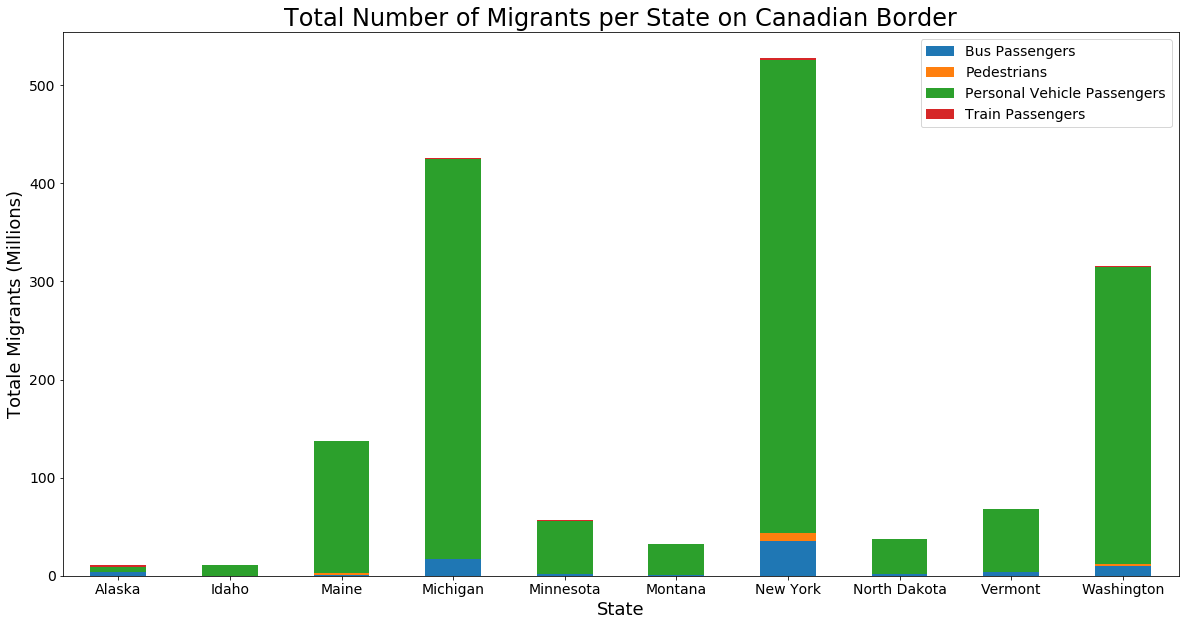

In [814]:
can_mig_total.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Totale Migrants (Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Total Number of Migrants per State on Canadian Border', fontsize=24)

# Now lets look at commercial imports

In [815]:
pvt_can_bd_state.head()

Value                                                   \
State           Alaska                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996          106758.0   7867.0       781.0                    259251.0   
1997          133063.0   9115.0       652.0                    256530.0   
1998          149938.0   9666.0       576.0                    303421.0   
1999          156234.0  10134.0       432.0                    260303.0   
2000          149128.0   9603.0       216.0                    264428.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996             116554.0                   0.0                  0.0   
1997             114562.0                   0.0                  0.0   
1998             124396.0                   0.0                  0.0   
1999             119662.0                   0.0                  0.0   
2000             117925.0                   0.0                  0.0   

                                                        ...              \
State                                                   ...  Washington   
Measure Train Passengers Trains Truck Containers Empty  ... Pedestrians   
Year                                                    ...               
1996             23068.0  234.0                    0.0  ...    104891.0   
1997             22323.0  259.0                  415.0  ...    105374.0   
1998             30580.0  277.0                 3323.0  ...     74095.0   
1999             28166.0  266.0                 2847.0  ...     66927.0   
2000             35253.0  326.0                 2466.0  ...    102167.0   

                                                                             \
State                                                                         
Measure Personal Vehicle Passengers Personal Vehicles Rail Containers Empty   
Year                                                                          
1996                     19708130.0         8305380.0               15234.0   
1997                     17948455.0         7694358.0               17910.0   
1998                     14099556.0         6035943.0               22086.0   
1999                     15803125.0         6001827.0               15603.0   
2000                     14239259.0         6052070.0               16602.0   

                                                                              \
State                                                                          
Measure Rail Containers Full Train Passengers  Trains Truck Containers Empty   
Year                                                                           
1996                 43415.0          46560.0  3245.0                62179.0   
1997                 52446.0          67073.0  3128.0               110233.0   
1998                 60742.0          51904.0  3190.0               163535.0   
1999                 65726.0          50324.0  2951.0               174427.0   
2000                 48770.0          52369.0  3032.0               134161.0   

                                         
State                                    
Measure Truck Containers Full    Trucks  
Year                                     
1996                 235340.0  597018.0  
1997                 367258.0  654965.0  
1998                 552224.0  748481.0  
1999                 517123.0  736352.0  
2000                 363244.0  778338.0  

[5 rows x 121 columns]

In [853]:
#Include all measures related to commercial movement. Include Rail Containers Full as well as Truck Containers Full
can_com_cont = pvt_can_bd_state[pvt_can_bd_state.columns[[6,10,18,22,30,34,42,46,54,58,66,70,78,82,90,94,103,107,115,119]]]
can_com_cont

Value                                             \
State                 Alaska                                      Idaho   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                     0.0                   0.0              24912.0   
1997                     0.0                 990.0              27371.0   
1998                     0.0                7816.0              33623.0   
1999                     0.0                6573.0              39872.0   
2000                     0.0                7244.0              47263.0   
2001                     0.0                7645.0              54593.0   
2002                     0.0                8472.0              60502.0   
2003                     0.0                8676.0              68047.0   
2004                     0.0                8954.0              71759.0   
2005                     0.0                7586.0              82294.0   
2006                     0.0                7258.0              88632.0   
2007                     0.0                7591.0              87387.0   
2008                     0.0                7061.0              92915.0   
2009                     0.0                7059.0              68792.0   
2010                     0.0               10141.0              89365.0   
2011                     0.0               10469.0              89989.0   
2012                     0.0                9920.0              88508.0   
2013                     0.0                9449.0              99890.0   
2014                     0.0                8694.0             119017.0   
2015                     0.0                8851.0             115711.0   
2016                     0.0                9584.0             115385.0   
2017                     NaN                4828.0             117879.0   
2018                     NaN                3323.0             119562.0   

                                                                          \
State                                        Maine                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                  44947.0               9917.0              163910.0   
1997                  42443.0              11496.0              222328.0   
1998                  42803.0              23324.0              332169.0   
1999                  47047.0              31210.0              343481.0   
2000                  50941.0              28139.0              344288.0   
2001                  53415.0              27790.0              303786.0   
2002                  55520.0              17417.0              390894.0   
2003                  46502.0              15405.0              387654.0   
2004                  45302.0              22639.0              407121.0   
2005                  48076.0              22885.0              396153.0   
2006                  52777.0              17996.0              370173.0   
2007                  53298.0              16215.0              332730.0   
2008                  51306.0              16666.0              271686.0   
2009                  49723.0              12513.0              189200.0   
2010                  49573.0              15783.0              199200.0   
2011                  46726.0              14639.0              176215.0   
2012                  48556.0              21274.0              183831.0   
2013                  44768.0              17840.0              180242.0   
2014                  53133.0              12923.0              172495.0   
2015                  54701.0              13561.0              186130.0   
2016                  61773.0              20475.0              190318.0   
2017                  59802.0              24344.0              190362.0   
2018                 

Seems like there are so null values. Need to change these to zeros

In [854]:
can_com_cont = can_com_cont.dropna(0)

In [855]:
can_com_cont

Value                                             \
State                 Alaska                                      Idaho   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                     0.0                   0.0              24912.0   
1997                     0.0                 990.0              27371.0   
1998                     0.0                7816.0              33623.0   
1999                     0.0                6573.0              39872.0   
2000                     0.0                7244.0              47263.0   
2001                     0.0                7645.0              54593.0   
2002                     0.0                8472.0              60502.0   
2003                     0.0                8676.0              68047.0   
2004                     0.0                8954.0              71759.0   
2005                     0.0                7586.0              82294.0   
2006                     0.0                7258.0              88632.0   
2007                     0.0                7591.0              87387.0   
2008                     0.0                7061.0              92915.0   
2009                     0.0                7059.0              68792.0   
2010                     0.0               10141.0              89365.0   
2011                     0.0               10469.0              89989.0   
2012                     0.0                9920.0              88508.0   
2013                     0.0                9449.0              99890.0   
2014                     0.0                8694.0             119017.0   
2015                     0.0                8851.0             115711.0   
2016                     0.0                9584.0             115385.0   

                                                                          \
State                                        Maine                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                  44947.0               9917.0              163910.0   
1997                  42443.0              11496.0              222328.0   
1998                  42803.0              23324.0              332169.0   
1999                  47047.0              31210.0              343481.0   
2000                  50941.0              28139.0              344288.0   
2001                  53415.0              27790.0              303786.0   
2002                  55520.0              17417.0              390894.0   
2003                  46502.0              15405.0              387654.0   
2004                  45302.0              22639.0              407121.0   
2005                  48076.0              22885.0              396153.0   
2006                  52777.0              17996.0              370173.0   
2007                  53298.0              16215.0              332730.0   
2008                  51306.0              16666.0              271686.0   
2009                  49723.0              12513.0              189200.0   
2010                  49573.0              15783.0              199200.0   
2011                  46726.0              14639.0              176215.0   
2012                  48556.0              21274.0              183831.0   
2013                  44768.0              17840.0              180242.0   
2014                  53133.0              12923.0              172495.0   
2015                  54701.0              13561.0              186130.0   
2016                  61773.0              20475.0              190318.0   

                                                                         \
State               Michigan                                  Minnesota   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                 

In [856]:
ak_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[6,10]]].sum(axis=1)

id_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[18,22]]].sum(axis=1)

can_com_table = pd.concat([ak_com_table, id_com_table], axis=1)

can_com_table = can_com_table.rename(columns={0: "Alaska", 1: "Idaho"})

main_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[30,34]]].sum(axis=1)

can_com_table = can_com_table.merge(main_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Main"})

mich_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[42,46]]].sum(axis=1)

can_com_table = can_com_table.merge(mich_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Michigan"})

minn_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[54,58]]].sum(axis=1)

can_com_table = can_com_table.merge(minn_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Minnesota"})

mont_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[66,70]]].sum(axis=1)

can_com_table = can_com_table.merge(mont_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Montana"})

ny_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[78,82]]].sum(axis=1)

can_com_table = can_com_table.merge(ny_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "New York"})

nd_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[91,95]]].sum(axis=1)

can_com_table = can_com_table.merge(nd_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "North Dakota"})

vt_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[103,107]]].sum(axis=1)

can_com_table = can_com_table.merge(vt_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Vermont"})

wash_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[115,119]]].sum(axis=1)

can_com_table = can_com_table.merge(wash_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Washington"})



In [857]:
can_com_table

,Alaska,Idaho,Main,Michigan,Minnesota,Montana,New York,North Dakota,Vermont,Washington
Year,,,,,,,,,,
1996,0.0,69859.0,173827.0,853228.0,51647.0,139077.0,1170.0,274432.0,109295.0,278755.0
1997,990.0,69814.0,233824.0,1168887.0,81487.0,155240.0,162460.0,305420.0,137031.0,419704.0
1998,7816.0,76426.0,355493.0,2415279.0,252425.0,164722.0,910993.0,311522.0,180928.0,612966.0
1999,6573.0,86919.0,374691.0,2645129.0,292565.0,182542.0,1734422.0,329986.0,206057.0,582849.0
2000,7244.0,98204.0,372427.0,2597482.0,304263.0,186304.0,1900927.0,349705.0,254420.0,412014.0
2001,7645.0,108008.0,331576.0,2729136.0,322417.0,193122.0,1863813.0,365771.0,303014.0,602707.0
2002,8472.0,116022.0,408311.0,2816840.0,353627.0,187286.0,1967516.0,356166.0,318878.0,580561.0
2003,8676.0,114549.0,403059.0,2802456.0,346111.0,161015.0,1975477.0,336254.0,301715.0,529525.0
2004,8954.0,117061.0,429760.0,2861708.0,358387.0,185348.0,1969602.0,346885.0,304061.0,596505.0


In [858]:
# access only alaskan commercial imports
# al_com_mig = can_com_table[('Value','Alaska')].head()
# al_com_mig

In [859]:
# al_com_imp = can_com_table[('Value','Alaska')].sum(axis=1)

In [860]:
# id_com_imp = can_com_table[('Value','Idaho')].sum(axis=1)

In [861]:
# can_com_table_sum = pd.concat([al_com_imp, id_com_imp], axis=1)
# can_com_table_sum.head()

In [862]:
# can_com_table_sum = can_com_table_sum.rename(columns={0: "Alaska", 1: "Idaho"})
# can_com_table_sum.head()

In [863]:
# It would be better to loop this for each state
# state = ['Main','Michigan','Minnesota','Monatana','New York', 'North Dakota','Vermont','Washington']

# for state in state:
#     can_state = can_com_table[('Value', state)].sum(axis=1)
#     can_com_table_sum = can_com_table_sum.merge(can_state.to_frame(), left_index=True, right_index=True)
#     can_com_table_sum = can_com_table_sum.rename(columns={0: state})
    
# can_com_table_sum   

In [864]:
can_com_table = can_com_table/1000000
can_com_table

,Alaska,Idaho,Main,Michigan,Minnesota,Montana,New York,North Dakota,Vermont,Washington
Year,,,,,,,,,,
1996,0.000000,0.069859,0.173827,0.853228,0.051647,0.139077,0.001170,0.274432,0.109295,0.278755
1997,0.000990,0.069814,0.233824,1.168887,0.081487,0.155240,0.162460,0.305420,0.137031,0.419704
1998,0.007816,0.076426,0.355493,2.415279,0.252425,0.164722,0.910993,0.311522,0.180928,0.612966
1999,0.006573,0.086919,0.374691,2.645129,0.292565,0.182542,1.734422,0.329986,0.206057,0.582849
2000,0.007244,0.098204,0.372427,2.597482,0.304263,0.186304,1.900927,0.349705,0.254420,0.412014
2001,0.007645,0.108008,0.331576,2.729136,0.322417,0.193122,1.863813,0.365771,0.303014,0.602707
2002,0.008472,0.116022,0.408311,2.816840,0.353627,0.187286,1.967516,0.356166,0.318878,0.580561
2003,0.008676,0.114549,0.403059,2.802456,0.346111,0.161015,1.975477,0.336254,0.301715,0.529525
2004,0.008954,0.117061,0.429760,2.861708,0.358387,0.185348,1.969602,0.346885,0.304061,0.596505


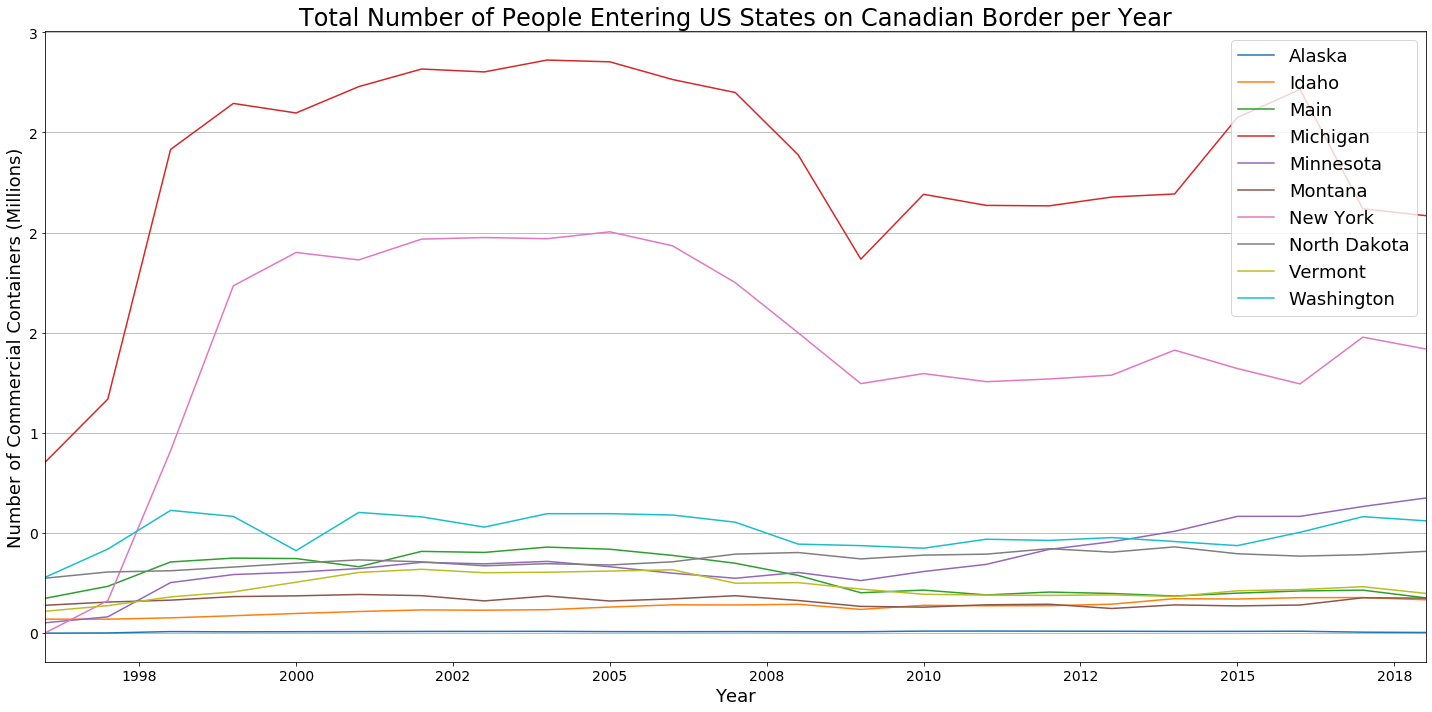

In [865]:
can_com_table.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Commercial Containers (Millions)', fontsize=18)
plt.title('Total Number of People Entering US States on Canadian Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()

In [866]:
can_com_cont.head()

Value                                             \
State                 Alaska                                      Idaho   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                     0.0                   0.0              24912.0   
1997                     0.0                 990.0              27371.0   
1998                     0.0                7816.0              33623.0   
1999                     0.0                6573.0              39872.0   
2000                     0.0                7244.0              47263.0   

                                                                          \
State                                        Maine                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                  44947.0               9917.0              163910.0   
1997                  42443.0              11496.0              222328.0   
1998                  42803.0              23324.0              332169.0   
1999                  47047.0              31210.0              343481.0   
2000                  50941.0              28139.0              344288.0   

                                                                         \
State               Michigan                                  Minnesota   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                197196.0              656032.0              20940.0   
1997                269954.0              898933.0              44891.0   
1998                433779.0             1981500.0             175229.0   
1999                459213.0             2185916.0             210011.0   
2000                528096.0             2069386.0             204386.0   

                                                                          \
State                                      Montana                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                  30707.0              18195.0              120882.0   
1997                  36596.0              18596.0              136644.0   
1998                  77196.0              17824.0              146898.0   
1999                  82554.0              17595.0              164947.0   
2000                  99877.0              15964.0              170340.0   

                                                                         \
State               New York                               North Dakota   
Measure Rail Containers Full Truck Containers Full Rail Containers Full   
Year                                                                      
1996                     0.0                1170.0                  0.0   
1997                 17931.0              144529.0                  0.0   
1998                105854.0              805139.0              20087.0   
1999                190227.0             1544195.0             102225.0   
2000                192614.0             1708313.0             112462.0   

                                                                          \
State                                      Vermont                         
Measure Truck Containers Full Rail Containers Full Truck Containers Full   
Year                                                                       
1996                  73754.0              15408.0               93887.0   
1997                    830.0              21396.0              115635.0   
1998                 138297.0              33122.0              147806.0   
1999                 268393.0              34857.0              171200.0   
2000             

In [867]:
can_com_cont_sum = can_com_cont.sum()

In [868]:
can_com_cont_sum = can_com_cont_sum.reset_index()

In [869]:
can_com_cont_sum = can_com_cont_sum.drop(columns='level_0')

In [870]:
can_com_cont_sum = can_com_cont_sum.rename(columns={0:'Total Containers'})

In [871]:
can_com_cont_sum

,State,Measure,Total Containers
0,Alaska,Rail Containers Full,0.0
1,Alaska,Truck Containers Full,160033.0
2,Idaho,Rail Containers Full,1565827.0
3,Idaho,Truck Containers Full,1043330.0
4,Maine,Rail Containers Full,390107.0
5,Maine,Truck Containers Full,5744004.0
6,Michigan,Rail Containers Full,9123803.0
7,Michigan,Truck Containers Full,40460883.0
8,Minnesota,Rail Containers Full,5822280.0
9,Minnesota,Truck Containers Full,1211720.0


In [872]:
can_com_cont_sum = can_com_cont_sum.pivot(index='State', columns='Measure', values='Total Containers')

In [873]:
can_com_cont_sum = can_com_cont_sum/1000000

Text(0.5, 1.0, 'Total Number of Migrants per State on Canadian Border')

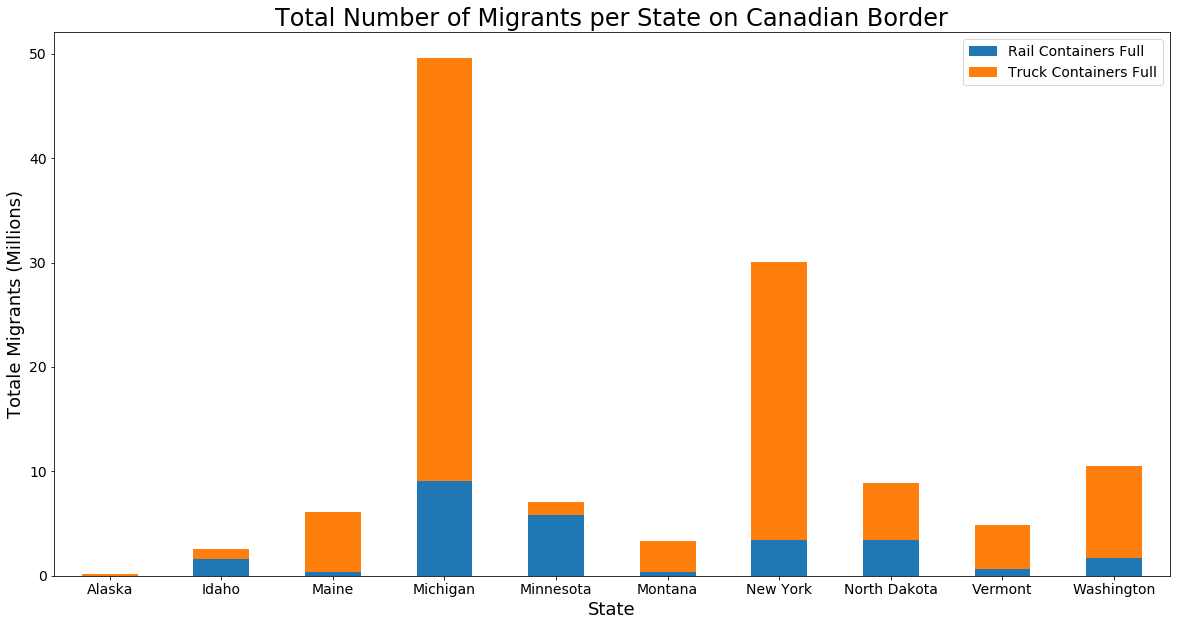

In [874]:
can_com_cont_sum.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Totale Migrants (Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Total Number of Migrants per State on Canadian Border', fontsize=24)